# ML/DS Case Assignment

# 1) Download the 2019 Chapel Hilll expert survey data set from <https://www.chesdata.eu/2019-chapel-hill-expert-survey> and preprocess it.

In [667]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import scipy.stats as sts
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [668]:
countryDict = {'1':'BE',
'2':'DK',
'3':'GE',
'4':'GR',
'5':'ESP',
'6':'FR',
'7':'IRL',
'8':'IT',
'10':'NL',
'11':'UK',
'12':'POR',
'13':'AUS',
'14':'FIN',
'16':'SV',
'20':'BUL',
'21':'CZ',
'22':'EST',
'23':'HUN',
'24':'LAT',
'25':'LITH',
'26':'POL',
'27':'ROM',
'28':'SLO',
'29':'SLE',
'31':'CRO',
'34':'TUR',
'35':'NOR',
'36':'SWI',
'37':'MAL',
'38':'LUX',
'40':'CYP',
'45':'ICE' }

In [669]:
# Import datset CHES2019_experts.csv file

df = pd.read_csv("CHES2019_experts.csv", sep=',', encoding= 'utf8')
pd.set_option("display.max_columns", None)
df.head(10)

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,10.0,6,NaN,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,BSP,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,7.0,9,NaN,5.0,8.0,NaN,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,DPS,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,9.0,5,NaN,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Volya,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,9.0,9,NaN,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,NFSB,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,5.0,9,NaN,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,Ataka,2007,3.0,6.0,4.0,NaN,3,NaN,5.0,5.0,9,NaN,2.0,8.0,8.0,10.0,10.0,1.0,10.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,2.0,9.0,9.0,2.0,4,6.0,9.0,7.0,9.0,6.0,3.0,3.0,3.0,2.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,BMRO,2005,5.0,6.0,2.0,NaN,4,NaN,5.0,5.0,9,NaN,2.0,8.0,6.0,10.0,10.0,1.0,10.0,8.0,1.0,8.0,10.0,6.0,7.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,2.0,9.0,9.0,7.0,2,4.0,9.0,NaN,9.0,7.0,3.0,5.0,4.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,DB,2018,7.0,10.0,0.0,NaN,9,NaN,0.0,9.0,1,NaN,1.0,9.0,9.0,2.0,3.0,5.0,1.0,5.0,1.0,6.0,3.0,2.0,9.0,9.0,9.0,10.0,0.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,9.0,1,4.0,5.0,1.0,2.0,7.0,7.0,7.0,7.0,7.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,DSB,2008,7.0,10.0,0.0,NaN,9,NaN,0.0,9.0,1,NaN,1.0,9.0,9.0,2.0,3.0,5.0,1.0,5.0,1.0,6.0,3.0,2.0,9.0,9.0,9.0,10.0,0.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,9.0,1,4.0,5.0,1.0,2.0,7.0,7.0,7.0,7.0,7.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,Slavi Trifonov,2019,6.0,9.0,1.0,NaN,5,NaN,5.0,5.0,5,NaN,1.0,5.0,5.0,NaN,NaN,NaN,3.0,5.0,1.0,NaN,NaN,NaN,NaN,9.0,NaN,10.0,NaN,5.0,2.0,2.0,5.0,5.0,5.0,4.0,2.0,1,9.0,9.0,1.0,9.0,7.0,6.0,7.0,6.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [670]:
df.shape

(3823, 63)

In [671]:
df.columns

Index(['id', 'party', 'party_name', 'party_id', 'position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigra_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_sel

In [672]:
# Check the dataframe structure

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3823 non-null   int64  
 1   party                  3823 non-null   int64  
 2   party_name             3811 non-null   object 
 3   party_id               3823 non-null   int64  
 4   position               3561 non-null   float64
 5   eu_salience            3523 non-null   float64
 6   eu_dissent             1499 non-null   float64
 7   eu_blur                1802 non-null   float64
 8   lrecon                 3651 non-null   object 
 9   lrecon_blur            1873 non-null   object 
 10  lrecon_dissent         1520 non-null   float64
 11  lrecon_salience        3523 non-null   float64
 12  galtan                 3677 non-null   object 
 13  galtan_blur            1642 non-null   float64
 14  galtan_dissent         1676 non-null   float64
 15  galt

## <b> 1. Data Preparation and Data Analysis
### 1) Data Statistics

In [673]:
df.describe()

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon_dissent,lrecon_salience,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
count,3823.000000,3823.000000,3823.000000,3561.000000,3523.000000,1499.000000,1802.000000,1520.000000,3523.000000,1642.000000,1676.000000,3485.000000,3610.000000,3438.000000,3459.000000,3094.000000,3167.000000,3167.000000,2871.000000,3396.000000,3329.000000,3262.000000,3367.000000,3340.000000,3240.000000,3432.000000,3405.000000,3461.000000,3220.000000,3276.000000,3490.000000,3200.000000,3078.000000,2874.000000,2846.000000,3232.000000,3453.000000,3291.000000,3279.000000,2589.000000,2685.000000,2825.000000,2670.000000,2734.000000,3734.000000,3735.000000,3814.000000,3674.000000,3797.000000,3799.000000,1989.000000,1989.000000,1989.000000,36.000000,43.000000,38.000000
mean,8.643735,5.353387,1864.380068,4.971637,6.085722,2.625751,3.146504,2.960526,6.355095,2.783800,2.856802,6.404878,5.299446,5.681792,5.952587,2.580155,5.577518,5.532997,2.433995,4.409894,6.183839,5.188228,4.736561,4.586527,4.796296,4.548951,5.151542,4.473851,4.234472,4.697802,5.175931,4.683125,5.281676,4.527488,2.962052,4.695235,4.401390,4.575509,7.051845,5.465817,4.011546,5.134867,3.784270,3.723848,2.710766,5.821687,1.710016,1972.347033,4.918093,3.326402,0.772500,1.028167,1.420311,4.916667,4.186047,4.552632
std,5.668377,3.102622,1100.263807,1.933308,2.457828,2.217037,2.596855,2.136185,2.253446,2.422755,2.327465,2.441022,2.582166,2.936724,2.642045,2.142334,3.016836,2.840812,2.034994,2.533628,2.334645,2.647456,2.803917,2.664307,2.646017,2.632320,2.930842,3.266881,3.070568,3.040331,3.105390,2.504181,2.585099,2.585424,3.094976,2.856780,3.349637,3.283466,2.467432,1.614299,1.907183,1.767628,1.831179,1.915189,0.794035,0.940837,0.477470,12.658841,1.885663,1.808154,0.347610,0.488534,0.607744,1.401530,2.442245,2.344601
min,1.000000,1.000000,102.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1933.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,837.000000,3.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,5.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,1.000000,3.000000,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.000000,1.000000,2.000000,5.000000,5.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,1.000000,1963.000000,4.000000,2.000000,0.534522,0.690066,0.997249,4.000000,2.000000,2.250000
50%,8.000000,5.000000,2101.000000,6.000000,6.000000,2.000000,3.000000,2.000000,7.000000,2.000000,2.000000,7.000000,5.000000,6.000000,6.000000,2.000000,5.000000,6.000000,2.000000,4.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,4.500000,4.000000,5.000000,7.000000,6.000000,4.000000,6.000000,4.000000,4.000000,3.000000,6.000000,2.000000,1975.000000,5.000000,3.000000,0.707107,0.900337,1.264911,5.000000,5.000000,5.000000
75

### 2) Missing Values

In [674]:
# Get the sum of missing values and its percentage over the total row
# Total missing values
mis_val = df.isnull().sum()

# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_type = df.dtypes

# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

# Return the dataframe with missing information
mis_val_table_ren_columns

The dataframe has 63 columns.
There are 60 columns that have missing values.


,Missing Values,% of Total Values,type
eu_econ_require,3787,99.1,float64
eu_googov_require,3785,99.0,float64
eu_political_require,3780,98.9,float64
eu_dissent,2324,60.8,float64
lrecon_dissent,2303,60.2,float64
galtan_blur,2181,57.0,float64
galtan_dissent,2147,56.2,float64
eu_blur,2021,52.9,float64
lrecon_blur,1950,51.0,object
galtan_sd,1834,48.0,float64


<AxesSubplot:>

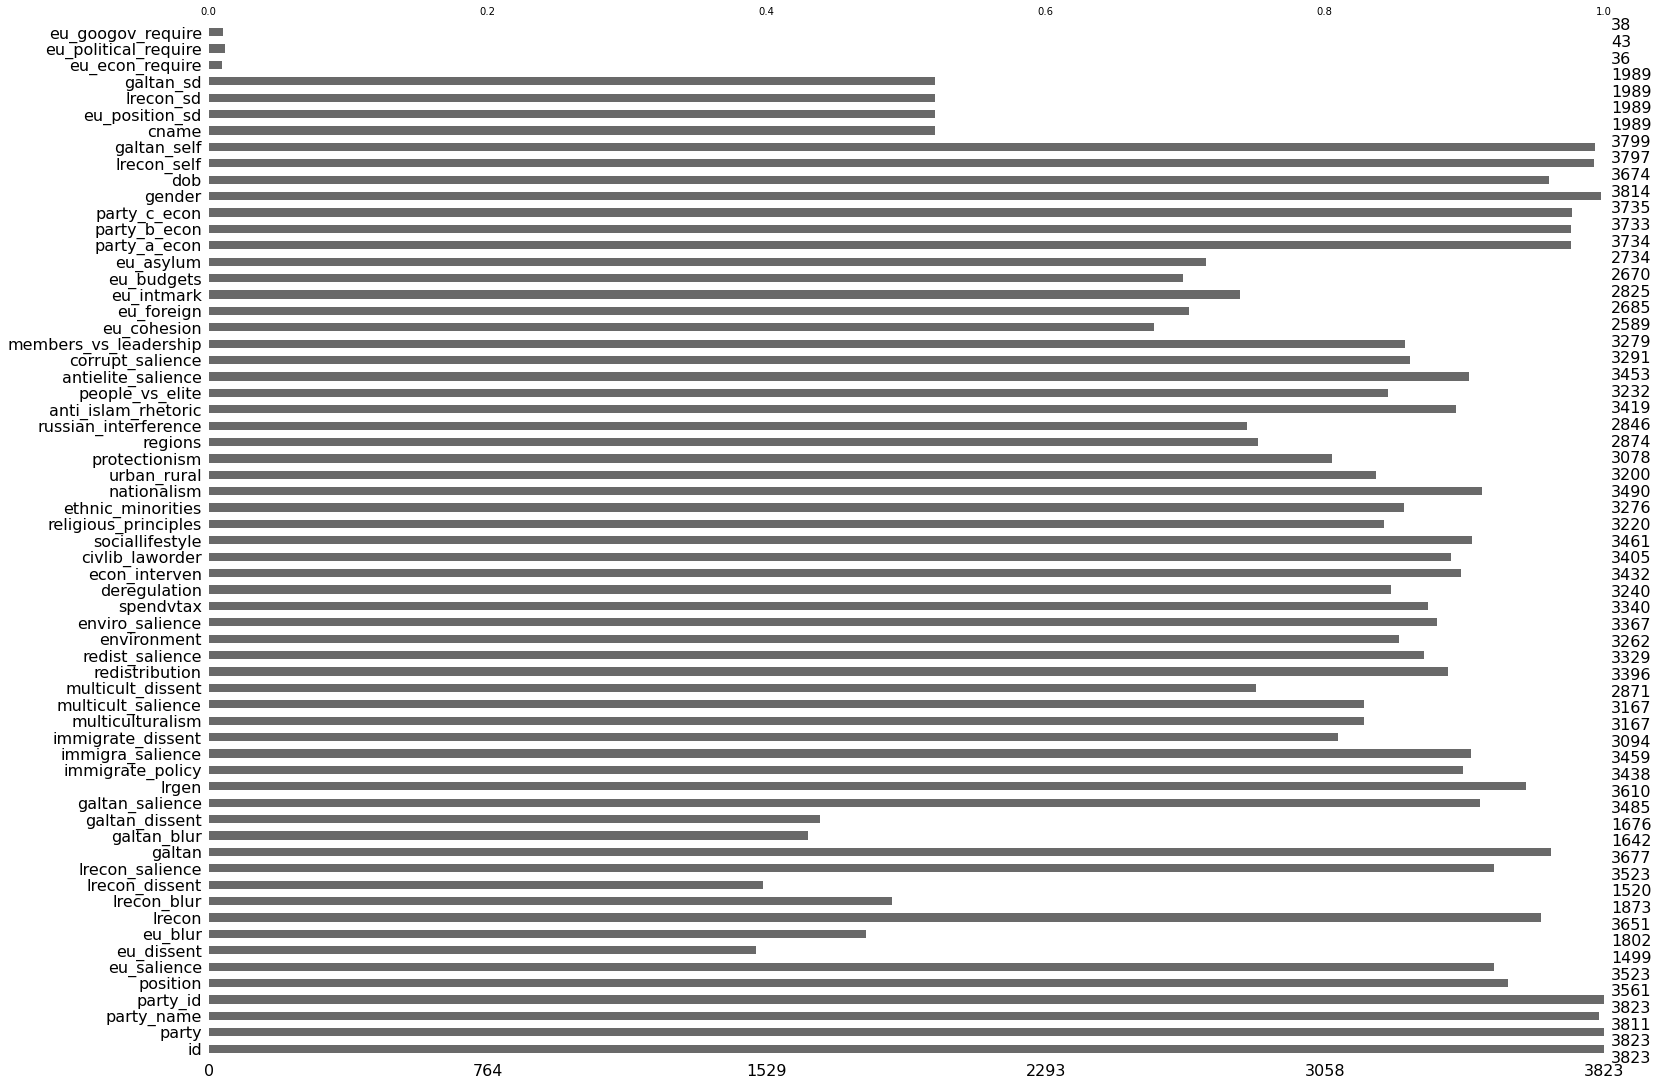

In [675]:
# Viusalize the null values
msno.bar(df)

<AxesSubplot:>

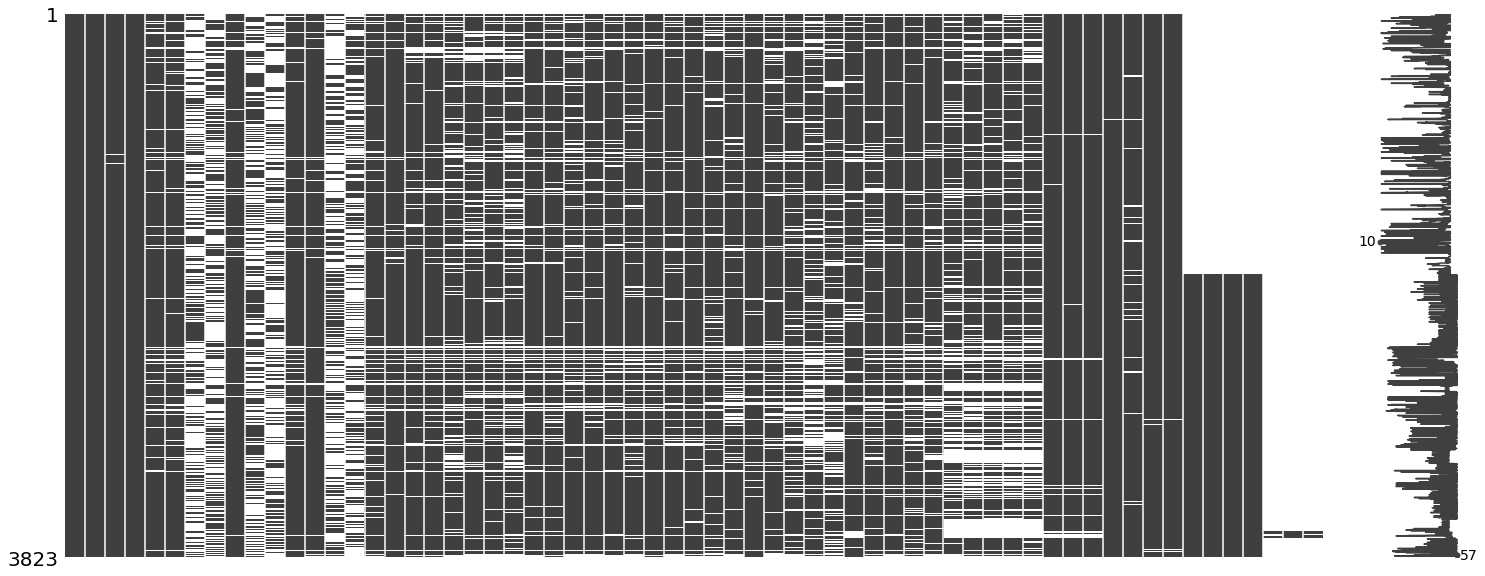

In [676]:
msno.matrix(df)

### Solve missing values

Party Name

In [677]:
df[df['party_name'].isna()] # All missing values corresponds to the same party_id

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
976,1,5,NaN,2406,4.0,5.0,6.0,NaN,7,NaN,7.0,6.0,10,NaN,3.0,NaN,10.0,10.0,8.0,2.0,10.0,7.0,1.0,6.0,5.0,4.0,1.0,6.0,4.0,8.0,9.0,10.0,6.0,10.0,10.0,8.0,3.0,6.0,10.0,10,8.0,1.0,2.0,6.0,7.0,4.0,6.0,7.0,1.0,1.0,10,6.0,2.0,1983.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2,5,NaN,2406,6.0,7.0,4.0,NaN,7,4,NaN,6.0,10,0.0,NaN,7.0,9.0,10.0,10.0,0.0,10.0,10.0,1.0,8.0,3.0,5.0,4.0,NaN,2.0,7.0,7.0,9.0,6.0,10.0,10.0,8.0,8.0,NaN,1.0,0,1.0,2.0,6.0,8.0,6.0,6.0,7.0,6.0,3.0,2.0,9,6.0,1.0,1943.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,3,5,NaN,2406,5.0,4.0,2.0,NaN,4,NaN,3.0,1.0,7,7.0,NaN,2.0,5.0,8.0,7.0,4.0,9.0,7.0,0.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,8.0,6.0,5.0,9.0,9.0,5.0,7.0,6.0,7.0,5,4.0,1.0,4.0,5.0,5.0,4.0,4.0,3.0,1.0,2.0,9,5.0,2.0,1960.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,4,5,NaN,2406,6.0,7.0,NaN,5.0,6,NaN,NaN,6.0,9,NaN,2.0,10.0,8.0,10.0,10.0,0.0,NaN,0.0,NaN,6.0,5.0,5.0,4.0,6.0,NaN,6.0,8.0,10.0,7.0,10.0,10.0,NaN,NaN,8.0,6.0,6,NaN,6.0,9.0,NaN,7.0,1.0,5.0,NaN,2.0,3.0,10,6.0,1.0,1985.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,5,5,NaN,2406,3.0,7.0,NaN,NaN,8,NaN,NaN,5.0,10,NaN,NaN,10.0,9.0,10.0,8.0,NaN,10.0,8.0,NaN,8.0,2.0,5.0,2.0,8.0,8.0,7.0,9.0,10.0,NaN,10.0,10.0,NaN,10.0,3.0,10.0,7,5.0,1.0,2.0,10.0,7.0,7.0,7.0,5.0,1.0,3.0,9,5.0,1.0,1985.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,6,5,NaN,2406,6.0,8.0,NaN,3.0,8,NaN,5.0,8.0,8,NaN,5.0,7.0,8.0,8.0,5.0,4.0,2.0,8.0,3.0,7.0,4.0,7.0,3.0,8.0,8.0,7.0,3.0,7.0,5.0,7.0,10.0,5.0,7.0,8.0,8.0,7,3.0,6.0,8.0,8.0,6.0,6.0,6.0,6.0,3.0,3.0,9,7.0,1.0,1977.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,7,5,NaN,2406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0,10.0,10.0,0.0,5.0,6.0,5.0,6.0,4.0,4.0,5.0,10.0,10.0,7.0,10.0,10.0,10.0,10.0,8.0,10.0,10,8.0,8.0,8.0,3.0,3.0,1.0,5.0,1.0,1.0,4.0,8,5.0,2.0,1976.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,8,5,NaN,2406,6.0,9.0,NaN,5.0,7,6,NaN,4.0,3,NaN,8.0,7.0,10.0,10.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,7.0,9.0,8.0,4.0,10.0,10.0,NaN,NaN,9.0,10.0,NaN,NaN,7.0,7.0,7.0,5.0,7.0,6.0,NaN,1.0,1.0,9,6.0,2.0,1942.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,9,5,NaN,2406,4.0,6.0,7.0,NaN,4,NaN,3.0,4.0,8,NaN,2.0,10.0,9.0,10.0,10.0,0.0,10.0,10.0,0.0,6.0,5.0,7.0,0.0,5.0,6.0,5.0,9.0,10.0,5.0,10.0,10.0,5.0,7.0,1.0,10.0,0,6.0,5.0,3.0,9.0,7.0,2.0,2.0,4.0,1.0,3.0,9,5.0,2.0,1982.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,10,5,NaN,2406,5.0,5.0,NaN,2.0,8,NaN,1.0,3.0,8,0.0,NaN,9.0,8.0,10.0,10.0,0.0,10.0,10.0,0.0,8.0,1.0,7.0,3.0,3.0,3.0,3.0,6.0,10.0,7.0,10.0,10.0,5.0,9.0,5.0,6.0,6,0.0,0.0,2.0,10.0,7.0,3.0,6.0,3.0,1.0,3.0,10,5.0,1.0,1980.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [678]:
# Replace the party_name as NA where party_id = 2406

df['party_name'] = np.where((df['party_name'].isnull()) & (df['party_id'] == 2406), 'NA', df['party_name'])

In [679]:
df[df['party_id'] == 2406]

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
976,1,5,NA,2406,4.0,5.0,6.0,NaN,7,NaN,7.0,6.0,10,NaN,3.0,NaN,10.0,10.0,8.0,2.0,10.0,7.0,1.0,6.0,5.0,4.0,1.0,6.0,4.0,8.0,9.0,10.0,6.0,10.0,10.0,8.0,3.0,6.0,10.0,10,8.0,1.0,2.0,6.0,7.0,4.0,6.0,7.0,1.0,1.0,10,6.0,2.0,1983.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,2,5,NA,2406,6.0,7.0,4.0,NaN,7,4,NaN,6.0,10,0.0,NaN,7.0,9.0,10.0,10.0,0.0,10.0,10.0,1.0,8.0,3.0,5.0,4.0,NaN,2.0,7.0,7.0,9.0,6.0,10.0,10.0,8.0,8.0,NaN,1.0,0,1.0,2.0,6.0,8.0,6.0,6.0,7.0,6.0,3.0,2.0,9,6.0,1.0,1943.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,3,5,NA,2406,5.0,4.0,2.0,NaN,4,NaN,3.0,1.0,7,7.0,NaN,2.0,5.0,8.0,7.0,4.0,9.0,7.0,0.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,8.0,6.0,5.0,9.0,9.0,5.0,7.0,6.0,7.0,5,4.0,1.0,4.0,5.0,5.0,4.0,4.0,3.0,1.0,2.0,9,5.0,2.0,1960.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,4,5,NA,2406,6.0,7.0,NaN,5.0,6,NaN,NaN,6.0,9,NaN,2.0,10.0,8.0,10.0,10.0,0.0,NaN,0.0,NaN,6.0,5.0,5.0,4.0,6.0,NaN,6.0,8.0,10.0,7.0,10.0,10.0,NaN,NaN,8.0,6.0,6,NaN,6.0,9.0,NaN,7.0,1.0,5.0,NaN,2.0,3.0,10,6.0,1.0,1985.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,5,5,NA,2406,3.0,7.0,NaN,NaN,8,NaN,NaN,5.0,10,NaN,NaN,10.0,9.0,10.0,8.0,NaN,10.0,8.0,NaN,8.0,2.0,5.0,2.0,8.0,8.0,7.0,9.0,10.0,NaN,10.0,10.0,NaN,10.0,3.0,10.0,7,5.0,1.0,2.0,10.0,7.0,7.0,7.0,5.0,1.0,3.0,9,5.0,1.0,1985.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,6,5,NA,2406,6.0,8.0,NaN,3.0,8,NaN,5.0,8.0,8,NaN,5.0,7.0,8.0,8.0,5.0,4.0,2.0,8.0,3.0,7.0,4.0,7.0,3.0,8.0,8.0,7.0,3.0,7.0,5.0,7.0,10.0,5.0,7.0,8.0,8.0,7,3.0,6.0,8.0,8.0,6.0,6.0,6.0,6.0,3.0,3.0,9,7.0,1.0,1977.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,7,5,NA,2406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0,10.0,10.0,0.0,5.0,6.0,5.0,6.0,4.0,4.0,5.0,10.0,10.0,7.0,10.0,10.0,10.0,10.0,8.0,10.0,10,8.0,8.0,8.0,3.0,3.0,1.0,5.0,1.0,1.0,4.0,8,5.0,2.0,1976.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,8,5,NA,2406,6.0,9.0,NaN,5.0,7,6,NaN,4.0,3,NaN,8.0,7.0,10.0,10.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,7.0,9.0,8.0,4.0,10.0,10.0,NaN,NaN,9.0,10.0,NaN,NaN,7.0,7.0,7.0,5.0,7.0,6.0,NaN,1.0,1.0,9,6.0,2.0,1942.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,9,5,NA,2406,4.0,6.0,7.0,NaN,4,NaN,3.0,4.0,8,NaN,2.0,10.0,9.0,10.0,10.0,0.0,10.0,10.0,0.0,6.0,5.0,7.0,0.0,5.0,6.0,5.0,9.0,10.0,5.0,10.0,10.0,5.0,7.0,1.0,10.0,0,6.0,5.0,3.0,9.0,7.0,2.0,2.0,4.0,1.0,3.0,9,5.0,2.0,1982.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,10,5,NA,2406,5.0,5.0,NaN,2.0,8,NaN,1.0,3.0,8,0.0,NaN,9.0,8.0,10.0,10.0,0.0,10.0,10.0,0.0,8.0,1.0,7.0,3.0,3.0,3.0,3.0,6.0,10.0,7.0,10.0,10.0,5.0,9.0,5.0,6.0,6,0.0,0.0,2.0,10.0,7.0,3.0,6.0,3.0,1.0,3.0,10,5.0,1.0,1980.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [680]:
# We have a total of 27 countries that belong to European union.
df['id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [681]:
# Every country is identified by the first 2 digits of party_id
df[df['party_name'] == 'GERB'][:10]

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,10.0,6,NaN,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,1,GERB,2010,5.0,7.0,3.0,NaN,5,NaN,2.0,8.0,8,2.0,NaN,8.0,5.0,8.0,9.0,1.0,8.0,4.0,1.0,6.0,6.0,7.0,5.0,5.0,4.0,2.0,8.0,8.0,8.0,5.0,7.0,2.0,7.0,9.0,3.0,2,5.0,8.0,5.0,9.0,7.0,5.0,6.0,NaN,2.0,3.0,9,6.0,2.0,1972.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,3,1,GERB,2010,7.0,9.0,4.0,NaN,7,7,NaN,10.0,5,NaN,4.0,4.0,7.0,5.0,3.0,6.0,5.0,NaN,3.0,5.0,4.0,2.0,5.0,5.0,6.0,4.0,8.0,NaN,6.0,5.0,6.0,3.0,4.0,7.0,9.0,2,8.0,2.0,3.0,9.0,7.0,6.0,6.0,5.0,5.0,2.0,10,5.0,1.0,1965.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,GERB,2010,6.0,8.0,4.0,NaN,4,7,NaN,6.0,6,NaN,7.0,3.0,4.0,7.0,5.0,5.0,6.0,4.0,4.0,3.0,2.0,6.0,3.0,5.0,4.0,2.0,5.0,5.0,3.0,6.0,6.0,5.0,4.0,7.0,6.0,2,5.0,2.0,3.0,10.0,7.0,5.0,7.0,5.0,4.0,4.0,8,6.0,1.0,1981.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,5,1,GERB,2010,6.0,7.0,2.0,NaN,6,7,NaN,8.0,5,7.0,NaN,6.0,6.0,5.0,5.0,2.0,4.0,5.0,3.0,6.0,3.0,5.0,5.0,4.0,7.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,3.0,5.0,4.0,4,3.0,0.0,6.0,9.0,6.0,5.0,6.0,5.0,5.0,3.0,9,5.0,1.0,1981.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,6,1,GERB,2010,7.0,10.0,NaN,1.0,8,2,NaN,9.0,7,NaN,5.0,4.0,7.0,9.0,8.0,1.0,9.0,3.0,1.0,7.0,3.0,7.0,2.0,5.0,6.0,4.0,6.0,4.0,7.0,5.0,6.0,6.0,6.0,6.0,7.0,4,3.0,3.0,3.0,10.0,7.0,5.0,6.0,5.0,5.0,2.0,10,6.0,1.0,1970.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,7,1,GERB,2010,7.0,8.0,NaN,0.0,5,NaN,0.0,8.0,2,NaN,1.0,3.0,6.0,9.0,5.0,0.0,9.0,2.0,0.0,6.0,7.0,9.0,0.0,5.0,9.0,10.0,8.0,9.0,6.0,5.0,5.0,1.0,1.0,3.0,5.0,2,0.0,1.0,6.0,5.0,7.0,5.0,7.0,5.0,2.0,2.0,7,3.0,1.0,1974.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,8,1,GERB,2010,7.0,9.0,2.0,NaN,8,NaN,0.0,7.0,7,7.0,NaN,4.0,8.0,6.0,5.0,NaN,9.0,8.0,NaN,8.0,NaN,8.0,0.0,6.0,7.0,8.0,8.0,7.0,8.0,6.0,8.0,5.0,NaN,NaN,3.0,5,6.0,3.0,0.0,9.0,7.0,6.0,7.0,NaN,6.0,2.0,10,6.0,1.0,1975.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,9,1,GERB,2010,7.0,10.0,NaN,1.0,6,NaN,2.0,9.0,4,NaN,5.0,5.0,6.0,7.0,10.0,2.0,5.0,7.0,3.0,5.0,8.0,3.0,3.0,2.0,3.0,7.0,5.0,5.0,7.0,4.0,3.0,4.0,4.0,3.0,8.0,2,3.0,2.0,9.0,7.0,7.0,6.0,6.0,7.0,6.0,3.0,9,6.0,2.0,1952.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,10,1,GERB,2010,7.0,10.0,NaN,6.0,4,8,NaN,10.0,8,NaN,7.0,8.0,4.0,8.0,7.0,2.0,8.0,6.0,3.0,6.0,5.0,7.0,4.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,3.0,9,5.0,1.0,1978.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [682]:
# In party_id column get the the first 2 or 1 digit according to their len size
df['party_id_split'] = df['party_id'].apply(lambda x: str(x)[:2] if len(str(x)) == 4 else str(x)[:1])


In [683]:
country_df = pd.DataFrame.from_dict(countryDict, orient='index',columns=['country'])
country_df = country_df.reset_index()
country_df = country_df.rename(columns={"index": "party_id_split"})
country_df

,party_id_split,country
0,1,BE
1,2,DK
2,3,GE
3,4,GR
4,5,ESP
5,6,FR
6,7,IRL
7,8,IT
8,10,NL
9,11,UK


In [684]:
df = pd.merge(df, country_df, on ='party_id_split', how='outer' )
df

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require,party_id_split,country
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,10.0,6,NaN,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
1,1,2,BSP,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,7.0,9,NaN,5.0,8.0,NaN,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
2,1,3,DPS,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,9.0,5,NaN,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
3,1,4,Volya,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,9.0,9,NaN,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
4,1,5,NFSB,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,5.0,9,NaN,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,BREXIT,1110,1.0,8.0,NaN,1.0,.d,NaN,NaN,NaN,8,1.0,NaN,6.0,8.0,8.0,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,9.0,6.0,7.0,NaN,NaN,6.0,NaN,.d,NaN,NaN,NaN,8.0,NaN,NaN,4.0,2.0,2.0,3.0,9,5.0,2.0,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3819,4,8,BREXIT,1110,1.0,10.0,0.0,NaN,8,1,NaN,5.0,NaN,NaN,NaN,NaN,8.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,.d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10,7.0,2.0,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3820,11,8,BREXIT,1110,NaN,NaN,NaN,NaN,.d,.d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9,5.0,1.0,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3821,16,8,BREXIT,1110,2.0,5.0,NaN,3.0,8,.d,NaN,NaN,10,NaN,NaN,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,NaN,10.0,NaN,NaN,NaN,0.0,0,2.0,3.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,3.0,8,5.0,1.0,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK


### Fill NaN of all ordinal columns

Replace the missing values of ordinal columns by the mode grouped by each party_name.

In [685]:

ordinal_columns = ['position','eu_salience', 'eu_dissent', 'eu_blur', 'lrecon',
       'lrecon_blur', 'lrecon_dissent', 'lrecon_salience', 'galtan',
       'galtan_blur', 'galtan_dissent', 'galtan_salience', 'lrgen',
       'immigrate_policy', 'immigra_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'multicult_dissent',
       'redistribution', 'redist_salience', 'environment', 'enviro_salience',
       'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
       'sociallifestyle', 'religious_principles', 'ethnic_minorities',
       'nationalism', 'urban_rural', 'protectionism', 'regions',
       'russian_interference', 'anti_islam_rhetoric', 'people_vs_elite',
       'antielite_salience', 'corrupt_salience', 'members_vs_leadership',
       'eu_cohesion', 'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum',
       'party_a_econ', 'party_b_econ', 'party_c_econ', 'gender', 
       'lrecon_self', 'galtan_self']

In [686]:
# replace ".d" value at each column by NaN

for i in ordinal_columns:
    df[i] = df[i].astype(str).str.replace('.d', 'nan')
    df[i] = df[i].astype(float)
df

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require,party_id_split,country
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5.0,NaN,1.0,10.0,6.0,NaN,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
1,1,2,BSP,2003,5.0,6.0,4.0,NaN,3.0,NaN,5.0,7.0,9.0,NaN,5.0,8.0,NaN,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
2,1,3,DPS,2004,7.0,9.0,2.0,NaN,5.0,NaN,1.0,9.0,5.0,NaN,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
3,1,4,Volya,2017,3.0,6.0,4.0,NaN,7.0,NaN,5.0,9.0,9.0,NaN,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
4,1,5,NFSB,2014,3.0,6.0,4.0,NaN,7.0,NaN,5.0,5.0,9.0,NaN,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,BREXIT,1110,1.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,8.0,1.0,NaN,6.0,8.0,8.0,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,9.0,6.0,7.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,4.0,2.0,2.0,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3819,4,8,BREXIT,1110,1.0,10.0,0.0,NaN,8.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,8.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3820,11,8,BREXIT,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3821,16,8,BREXIT,1110,2.0,5.0,NaN,3.0,8.0,NaN,NaN,NaN,10.0,NaN,NaN,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,NaN,10.0,NaN,NaN,NaN,0.0,0.0,2.0,3.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK


In [687]:
for col in ordinal_columns:
    df[col] = df.groupby('party_name')[col].transform(lambda x: x.fillna(x.median())).round()
df

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require,party_id_split,country
0,1,1,GERB,2010,7.0,9.0,1.0,3.0,5.0,7.0,1.0,10.0,6.0,4.0,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
1,1,2,BSP,2003,5.0,6.0,4.0,7.0,3.0,6.0,5.0,7.0,9.0,2.0,5.0,8.0,3.0,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
2,1,3,DPS,2004,7.0,9.0,2.0,2.0,5.0,3.0,1.0,9.0,5.0,4.0,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
3,1,4,Volya,2017,3.0,6.0,4.0,5.0,7.0,6.0,5.0,9.0,9.0,2.0,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
4,1,5,NFSB,2014,3.0,6.0,4.0,3.0,7.0,6.0,5.0,5.0,9.0,0.0,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,BREXIT,1110,1.0,8.0,1.0,1.0,7.0,4.0,2.0,4.0,8.0,1.0,2.0,6.0,8.0,8.0,6.0,1.0,9.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,7.0,9.0,6.0,7.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,4.0,2.0,2.0,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3819,4,8,BREXIT,1110,1.0,10.0,0.0,2.0,8.0,1.0,2.0,5.0,9.0,1.0,2.0,8.0,8.0,8.0,3.0,2.0,8.0,6.0,2.0,6.0,3.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,8.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3820,11,8,BREXIT,1110,2.0,8.0,1.0,2.0,7.0,4.0,2.0,4.0,9.0,1.0,2.0,8.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,9.0,6.0,8.0,6.0,0.0,0.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK
3821,16,8,BREXIT,1110,2.0,5.0,1.0,3.0,8.0,4.0,2.0,4.0,10.0,1.0,2.0,7.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,2.0,7.0,3.0,7.0,6.0,7.0,10.0,10.0,10.0,8.0,10.0,6.0,8.0,6.0,0.0,0.0,2.0,3.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN,11,UK


In [688]:
# Do the same step just for 'dob' column
df['dob'] = df.groupby('party_name')['dob'].transform(lambda x: x.fillna(x.median())).round()

### Fill Nan of non ordinal variables.

In [689]:
df[df['lrecon_sd'].isnull()]

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require,party_id_split,country
0,1,1,GERB,2010,7.0,9.0,1.0,3.0,5.0,7.0,1.0,10.0,6.0,4.0,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
1,1,2,BSP,2003,5.0,6.0,4.0,7.0,3.0,6.0,5.0,7.0,9.0,2.0,5.0,8.0,3.0,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
2,1,3,DPS,2004,7.0,9.0,2.0,2.0,5.0,3.0,1.0,9.0,5.0,4.0,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
3,1,4,Volya,2017,3.0,6.0,4.0,5.0,7.0,6.0,5.0,9.0,9.0,2.0,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
4,1,5,NFSB,2014,3.0,6.0,4.0,3.0,7.0,6.0,5.0,5.0,9.0,0.0,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,15,5,Levica,2912,5.0,6.0,4.0,5.0,0.0,0.0,2.0,7.0,0.0,1.0,0.0,10.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0,10.0,8.0,7.0,2.0,3.0,1.0,7.0,2.0,8.0,4.0,3.0,1965.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,SLE
1830,15,6,NSI,2905,6.0,8.0,2.0,3.0,8.0,2.0,2.0,10.0,9.0,2.0,2.0,9.0,6.0,9.0,7.0,1.0,5.0,9.0,0.0,5.0,3.0,5.0,6.0,8.0,10.0,1.0,7.0,10.0,10.0,5.0,7.0,9.0,5.0,1.0,5.0,5.0,5.0,4.0,10.0,9.0,7.0,6.0,7.0,7.0,3.0,2.0,8.0,4.0,3.0,1965.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,SLE
1831,15,7,Alenka Bratusek,2913,7.0,8.0,1.0,3.0,2.0,5.0,2.0,9.0,2.0,3.0,2.0,8.0,3.0,1.0,5.0,1.0,2.0,1.0,0.0,1.0,7.0,5.0,6.0,3.0,3.0,7.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,5.0,0.0,1.0,2.0,2.0,10.0,10.0,7.0,6.0,7.0,5.0,6.0,2.0,8.0,4.0,3.0,1965.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,SLE
1832,15,8,DeSUS,2906,7.0,7.0,4.0,4.0,2.0,5.0,2.0,8.0,4.0,7.0,3.0,7.0,4.0,2.0,4.0,2.0,3.0,2.0,1.0,1.0,7.0,5.0,5.0,2.0,3.0,6.0,2.0,2.0,0.0,0.0,3.0,2.0,3.0,6.0,0.0,2.0,2.0,2.0,8.0,10.0,7.0,5.0,7.0,5.0,6.0,2.0,8.0,4.0,3.0,1965.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,SLE


In [690]:
df[df['lrgen'] == 1]

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require,party_id_split,country
33,4,4,Volya,2017,3.0,4.0,5.0,5.0,0.0,9.0,2.0,6.0,7.0,2.0,6.0,4.0,1.0,3.0,2.0,4.0,6.0,4.0,3.0,0.0,1.0,8.0,3.0,3.0,2.0,1.0,5.0,6.0,6.0,6.0,7.0,4.0,6.0,6.0,5.0,1.0,8.0,8.0,2.0,7.0,4.0,2.0,5.0,4.0,4.0,4.0,8.0,6.0,1.0,1981.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
64,7,5,NFSB,2014,1.0,9.0,2.0,0.0,1.0,6.0,2.0,4.0,10.0,0.0,0.0,9.0,1.0,10.0,10.0,0.0,10.0,1.0,0.0,2.0,8.0,8.0,0.0,1.0,2.0,2.0,10.0,10.0,10.0,10.0,10.0,5.0,10.0,6.0,1.0,10.0,10.0,10.0,0.0,10.0,5.0,1.0,5.0,1.0,1.0,2.0,7.0,3.0,1.0,1974.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
65,7,6,Ataka,2007,1.0,9.0,2.0,0.0,1.0,6.0,0.0,4.0,10.0,0.0,0.0,9.0,1.0,10.0,10.0,0.0,10.0,1.0,0.0,2.0,8.0,8.0,0.0,1.0,2.0,2.0,10.0,10.0,10.0,10.0,10.0,5.0,10.0,7.0,1.0,10.0,10.0,10.0,0.0,10.0,3.0,1.0,2.0,1.0,1.0,2.0,7.0,3.0,1.0,1974.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
66,7,7,BMRO,2005,1.0,9.0,2.0,0.0,1.0,5.0,0.0,4.0,10.0,0.0,0.0,9.0,1.0,10.0,10.0,0.0,10.0,1.0,0.0,2.0,8.0,6.0,0.0,1.0,2.0,2.0,10.0,10.0,10.0,10.0,10.0,5.0,10.0,7.0,1.0,10.0,10.0,10.0,0.0,10.0,6.0,1.0,3.0,1.0,1.0,2.0,7.0,3.0,1.0,1974.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
175,18,6,Ataka,2007,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,10.0,0.0,1.0,10.0,1.0,9.0,8.0,0.0,10.0,10.0,0.0,1.0,1.0,8.0,0.0,2.0,1.0,2.0,10.0,10.0,8.0,8.0,10.0,5.0,8.0,7.0,10.0,10.0,8.0,8.0,6.0,10.0,2.0,1.0,2.0,1.0,1.0,3.0,8.0,7.0,2.0,1974.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,BUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,14,2,LAB,1102,3.0,4.0,9.0,5.0,1.0,1.0,6.0,9.0,0.0,0.0,3.0,8.0,1.0,1.0,7.0,7.0,0.0,9.0,6.0,0.0,10.0,2.0,6.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,2.0,1.0,6.0,3.0,1.0,9.0,8.0,2.0,1.0,7.0,5.0,2.0,5.0,2.0,3.0,2.0,7.0,4.0,1.0,1989.0,5.0,4.0,uk,1.118034,0.747545,1.104802,NaN,NaN,NaN,11,UK
3719,9,2,LAB,1102,4.0,10.0,10.0,8.0,2.0,1.0,8.0,10.0,2.0,2.0,3.0,3.0,1.0,3.0,10.0,8.0,5.0,9.0,4.0,1.0,8.0,4.0,7.0,1.0,1.0,1.0,2.0,0.0,5.0,2.0,3.0,2.0,7.0,2.0,8.0,2.0,1.0,7.0,0.0,2.0,5.0,2.0,3.0,2.0,2.0,3.0,10.0,5.0,2.0,1946.0,2.0,3.0,uk,1.118034,0.747545,1.104802,NaN,NaN,NaN,11,UK
3740,10,4,GREEN,1107,7.0,6.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,2.0,8.0,1.0,1.0,7.0,2.0,3.0,7.0,1.0,1.0,8.0,1.0,9.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,6.0,1.0,2.0,6.0,6.0,3.0,2.0,3.0,6.0,6.0,3.0,6.0,6.0,3.0,9.0,7.0,2.0,1984.0,3.0,2.0,uk,0.587868,1.053705,0.655108,NaN,NaN,NaN,11,UK
3751,11,4,GREEN,1107,7.0,5.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,1.0,2.0,7.0,1.0,2.0,4.0,1.0,2.0,6.0,1.0,1.0,7.0,1.0,10.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,3.0,6.0,2.0,0.0,0.0,6.0,5.0,0.0,1.0,6.0,5.0,6.0,5.0,6.0,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,uk,0.587868,1.053705,0.655108,NaN,NaN,NaN,11,UK


(array([39., 60., 26., 16.,  1.,  0., 26.,  0.,  0.,  1.]),
 array([0.33333334, 0.55226251, 0.77119167, 0.99012084, 1.20905   ,
        1.42797917, 1.64690834, 1.8658375 , 2.08476667, 2.30369583,
        2.522625  ]),
 <BarContainer object of 10 artists>)

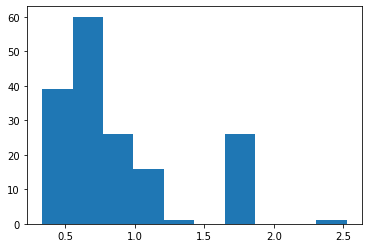

In [691]:
plt.hist(df['lrecon_sd'][df['lrgen'] == 1])

In [692]:
# Apply the median on 'eu_position_sd''lrecon_sd''galtan_sd' grouping by 'lrgen' (political orientation)

numerical_col = ['eu_position_sd','lrecon_sd','galtan_sd']

for col in numerical_col:
    df[col] = df.groupby('lrgen')[col].transform(lambda x: x.fillna(x.median()))

In [693]:
# Drop columns that are not going to be used
# Add column "cname" because it has some NaN values that filled by the columns "country"

df = df.drop(columns=['party_id_split','eu_political_require','eu_googov_require','eu_econ_require','cname'])

<AxesSubplot:>

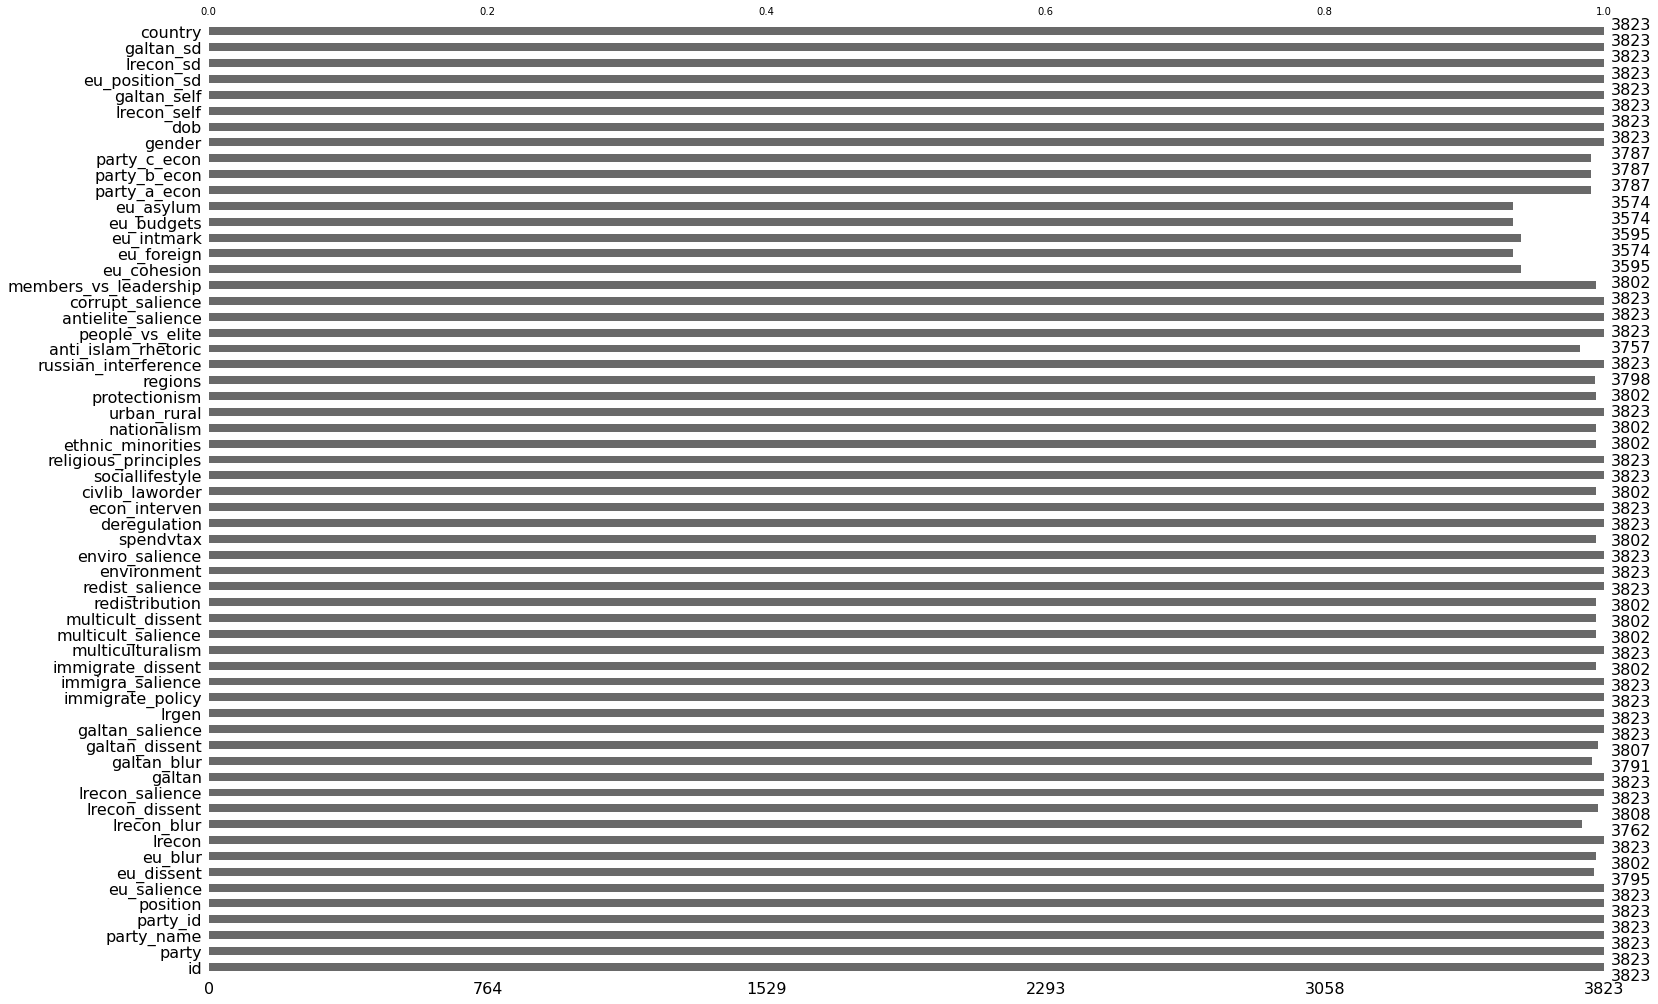

In [694]:
msno.bar(df)

In [695]:
# Get the sum of missing values and its percentage over the total row
# Total missing values
mis_val = df.isnull().sum()

# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_type = df.dtypes

# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

# Return the dataframe with missing information
mis_val_table_ren_columns[:5]

The dataframe has 60 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values,type
eu_asylum,249,6.5,float64
eu_budgets,249,6.5,float64
eu_foreign,249,6.5,float64
eu_intmark,228,6.0,float64
eu_cohesion,228,6.0,float64


In [696]:
# Drop rows where we still have null values.
df = df[df['eu_asylum'].notnull()]
df = df[df['lrecon_blur'].notnull()]
df = df[df['galtan_dissent'].notnull()]
df = df[df['lrecon_dissent'].notnull()]
df = df[df['galtan_blur'].notnull()]
df = df[df['regions'].notnull()]


<AxesSubplot:>

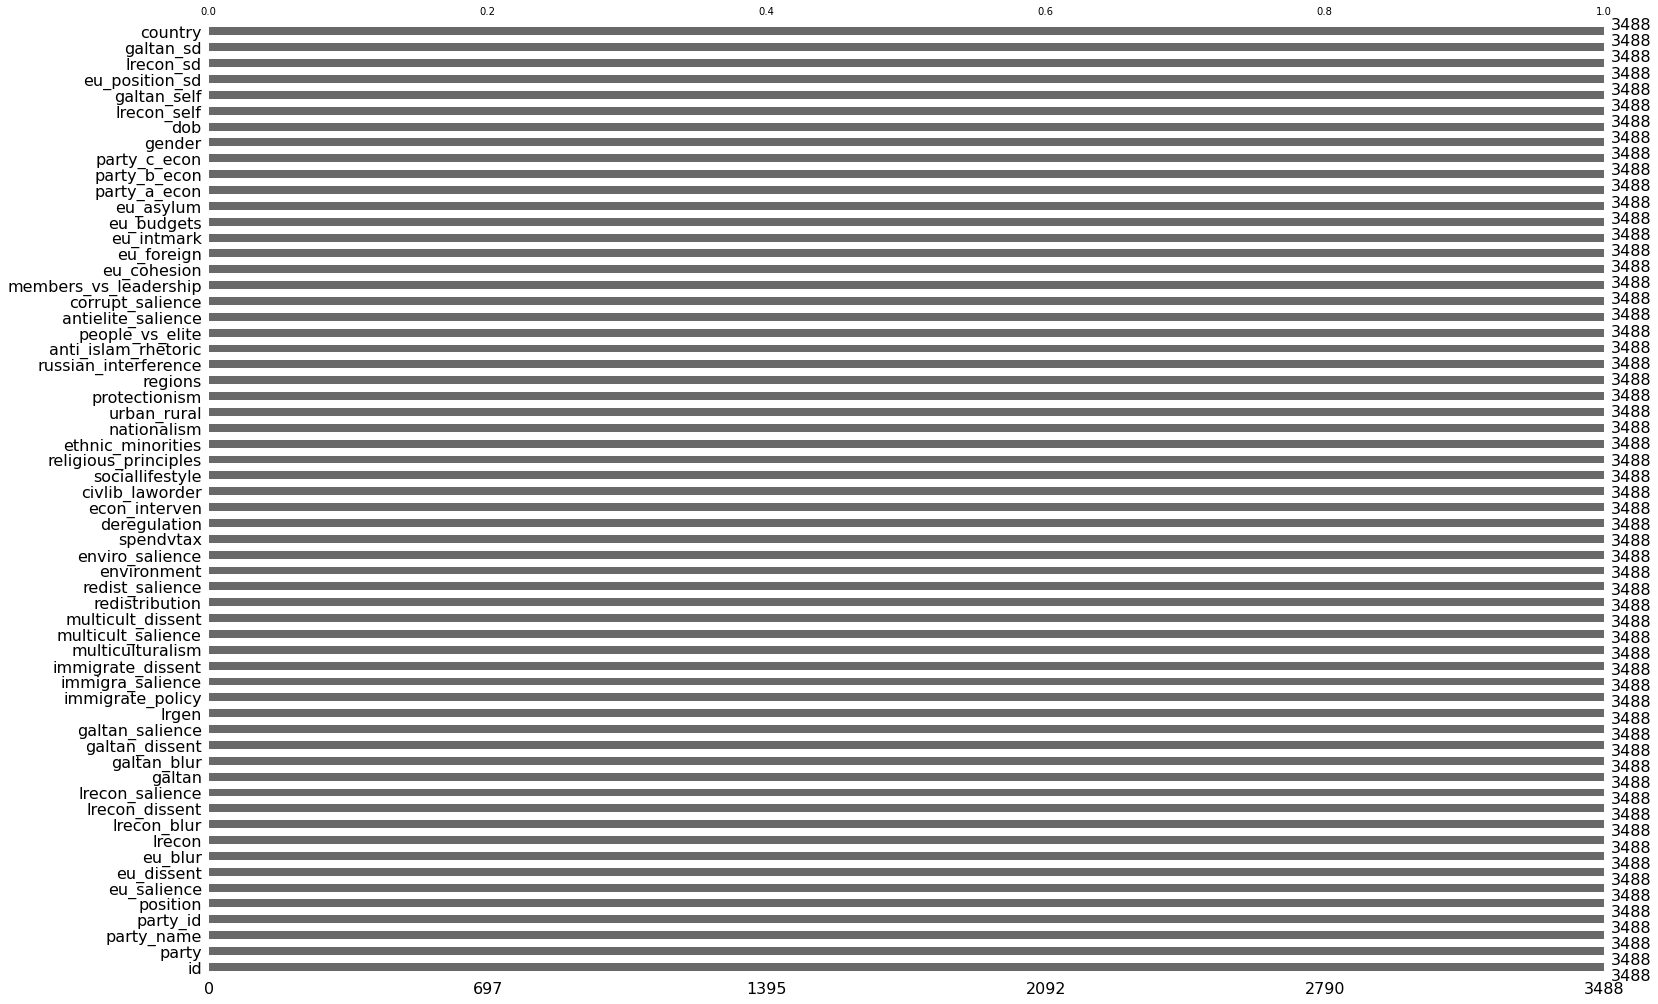

In [697]:
msno.bar(df)

## Standard Scaling


In [698]:
df

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,country
0,1,1,GERB,2010,7.0,9.0,1.0,3.0,5.0,7.0,1.0,10.0,6.0,4.0,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.690066,0.941124,1.374284,BUL
1,1,2,BSP,2003,5.0,6.0,4.0,7.0,3.0,6.0,5.0,7.0,9.0,2.0,5.0,8.0,3.0,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.650444,0.862316,1.138729,BUL
2,1,3,DPS,2004,7.0,9.0,2.0,2.0,5.0,3.0,1.0,9.0,5.0,4.0,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.650444,0.857493,1.253566,BUL
3,1,4,Volya,2017,3.0,6.0,4.0,5.0,7.0,6.0,5.0,9.0,9.0,2.0,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.668558,0.948683,1.386750,BUL
4,1,5,NFSB,2014,3.0,6.0,4.0,3.0,7.0,6.0,5.0,5.0,9.0,0.0,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.668558,0.948683,1.386750,BUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,BREXIT,1110,1.0,8.0,1.0,1.0,7.0,4.0,2.0,4.0,8.0,1.0,2.0,6.0,8.0,8.0,6.0,1.0,9.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,7.0,9.0,6.0,7.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,4.0,2.0,2.0,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928,UK
3819,4,8,BREXIT,1110,1.0,10.0,0.0,2.0,8.0,1.0,2.0,5.0,9.0,1.0,2.0,8.0,8.0,8.0,3.0,2.0,8.0,6.0,2.0,6.0,3.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,8.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928,UK
3820,11,8,BREXIT,1110,2.0,8.0,1.0,2.0,7.0,4.0,2.0,4.0,9.0,1.0,2.0,8.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,9.0,6.0,8.0,6.0,0.0,0.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928,UK
3821,16,8,BREXIT,1110,2.0,5.0,1.0,3.0,8.0,4.0,2.0,4.0,10.0,1.0,2.0,7.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,2.0,7.0,3.0,7.0,6.0,7.0,10.0,10.0,10.0,8.0,10.0,6.0,8.0,6.0,0.0,0.0,2.0,3.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928,UK


In [699]:
df_num = df.iloc[:,2:-1]
df_num

,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,GERB,2010,7.0,9.0,1.0,3.0,5.0,7.0,1.0,10.0,6.0,4.0,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.690066,0.941124,1.374284
1,BSP,2003,5.0,6.0,4.0,7.0,3.0,6.0,5.0,7.0,9.0,2.0,5.0,8.0,3.0,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.650444,0.862316,1.138729
2,DPS,2004,7.0,9.0,2.0,2.0,5.0,3.0,1.0,9.0,5.0,4.0,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.650444,0.857493,1.253566
3,Volya,2017,3.0,6.0,4.0,5.0,7.0,6.0,5.0,9.0,9.0,2.0,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.668558,0.948683,1.386750
4,NFSB,2014,3.0,6.0,4.0,3.0,7.0,6.0,5.0,5.0,9.0,0.0,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.668558,0.948683,1.386750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,BREXIT,1110,1.0,8.0,1.0,1.0,7.0,4.0,2.0,4.0,8.0,1.0,2.0,6.0,8.0,8.0,6.0,1.0,9.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,7.0,9.0,6.0,7.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,4.0,2.0,2.0,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928
3819,BREXIT,1110,1.0,10.0,0.0,2.0,8.0,1.0,2.0,5.0,9.0,1.0,2.0,8.0,8.0,8.0,3.0,2.0,8.0,6.0,2.0,6.0,3.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,8.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928
3820,BREXIT,1110,2.0,8.0,1.0,2.0,7.0,4.0,2.0,4.0,9.0,1.0,2.0,8.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,9.0,6.0,8.0,6.0,0.0,0.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928
3821,BREXIT,1110,2.0,5.0,1.0,3.0,8.0,4.0,2.0,4.0,10.0,1.0,2.0,7.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,2.0,7.0,3.0,7.0,6.0,7.0,10.0,10.0,10.0,8.0,10.0,6.0,8.0,6.0,0.0,0.0,2.0,3.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928


In [700]:
df_num = df_num.reset_index(drop=True)

In [701]:
df_num

,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,GERB,2010,7.0,9.0,1.0,3.0,5.0,7.0,1.0,10.0,6.0,4.0,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.690066,0.941124,1.374284
1,BSP,2003,5.0,6.0,4.0,7.0,3.0,6.0,5.0,7.0,9.0,2.0,5.0,8.0,3.0,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.650444,0.862316,1.138729
2,DPS,2004,7.0,9.0,2.0,2.0,5.0,3.0,1.0,9.0,5.0,4.0,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.650444,0.857493,1.253566
3,Volya,2017,3.0,6.0,4.0,5.0,7.0,6.0,5.0,9.0,9.0,2.0,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.668558,0.948683,1.386750
4,NFSB,2014,3.0,6.0,4.0,3.0,7.0,6.0,5.0,5.0,9.0,0.0,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.668558,0.948683,1.386750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,BREXIT,1110,1.0,8.0,1.0,1.0,7.0,4.0,2.0,4.0,8.0,1.0,2.0,6.0,8.0,8.0,6.0,1.0,9.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,7.0,9.0,6.0,7.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,4.0,2.0,2.0,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928
3484,BREXIT,1110,1.0,10.0,0.0,2.0,8.0,1.0,2.0,5.0,9.0,1.0,2.0,8.0,8.0,8.0,3.0,2.0,8.0,6.0,2.0,6.0,3.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,8.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928
3485,BREXIT,1110,2.0,8.0,1.0,2.0,7.0,4.0,2.0,4.0,9.0,1.0,2.0,8.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,9.0,6.0,8.0,6.0,0.0,0.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928
3486,BREXIT,1110,2.0,5.0,1.0,3.0,8.0,4.0,2.0,4.0,10.0,1.0,2.0,7.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,2.0,7.0,3.0,7.0,6.0,7.0,10.0,10.0,10.0,8.0,10.0,6.0,8.0,6.0,0.0,0.0,2.0,3.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928


In [702]:
# df_paryId_lrgen = df_num[['party_id','lrgen']]
df_paryId_lrgen = df_num[['party_name','lrgen']]
df_paryId_lrgen

,party_name,lrgen
0,GERB,5.0
1,BSP,3.0
2,DPS,4.0
3,Volya,6.0
4,NFSB,6.0
...,...,...
3483,BREXIT,8.0
3484,BREXIT,8.0
3485,BREXIT,8.0
3486,BREXIT,8.0


In [703]:
df_num = df_num.iloc[:,-55:]
df_num = df_num.drop(['dob'], axis = 1)

In [704]:
df_num

,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,7.0,9.0,1.0,3.0,5.0,7.0,1.0,10.0,6.0,4.0,5.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,3.0,9.0,6.0,1.0,9.0,3.0,0.690066,0.941124,1.374284
1,5.0,6.0,4.0,7.0,3.0,6.0,5.0,7.0,9.0,2.0,5.0,8.0,3.0,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,3.0,9.0,6.0,1.0,9.0,3.0,0.650444,0.862316,1.138729
2,7.0,9.0,2.0,2.0,5.0,3.0,1.0,9.0,5.0,4.0,2.0,8.0,4.0,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,3.0,9.0,6.0,1.0,9.0,3.0,0.650444,0.857493,1.253566
3,3.0,6.0,4.0,5.0,7.0,6.0,5.0,9.0,9.0,2.0,2.0,8.0,6.0,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,3.0,9.0,6.0,1.0,9.0,3.0,0.668558,0.948683,1.386750
4,3.0,6.0,4.0,3.0,7.0,6.0,5.0,5.0,9.0,0.0,2.0,8.0,6.0,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,3.0,9.0,6.0,1.0,9.0,3.0,0.668558,0.948683,1.386750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,1.0,8.0,1.0,1.0,7.0,4.0,2.0,4.0,8.0,1.0,2.0,6.0,8.0,8.0,6.0,1.0,9.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,7.0,9.0,6.0,7.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,4.0,2.0,2.0,3.0,9.0,5.0,2.0,5.0,3.0,1.087811,1.964971,1.192928
3484,1.0,10.0,0.0,2.0,8.0,1.0,2.0,5.0,9.0,1.0,2.0,8.0,8.0,8.0,3.0,2.0,8.0,6.0,2.0,6.0,3.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,8.0,6.0,8.0,6.0,1.0,4.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,2.0,10.0,7.0,2.0,6.0,3.0,1.087811,1.964971,1.192928
3485,2.0,8.0,1.0,2.0,7.0,4.0,2.0,4.0,9.0,1.0,2.0,8.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,4.0,7.0,3.0,7.0,6.0,7.0,8.0,9.0,10.0,8.0,9.0,6.0,8.0,6.0,0.0,0.0,5.0,6.0,0.0,8.0,4.0,1.0,2.0,1.0,1.0,3.0,9.0,5.0,1.0,3.0,2.0,1.087811,1.964971,1.192928
3486,2.0,5.0,1.0,3.0,8.0,4.0,2.0,4.0,10.0,1.0,2.0,7.0,8.0,8.0,6.0,2.0,8.0,6.0,2.0,6.0,2.0,7.0,3.0,7.0,6.0,7.0,10.0,10.0,10.0,8.0,10.0,6.0,8.0,6.0,0.0,0.0,2.0,3.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0,5.0,1.0,5.0,3.0,1.087811,1.964971,1.192928


In [705]:
std = StandardScaler()
X = std.fit_transform(df_num)
df_scale = pd.DataFrame(data=X ,columns=df_num.columns)

In [706]:
df_scale

,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,1.026870,1.182179,-0.819043,-0.033527,0.013043,1.482705,-1.024529,1.661168,0.290893,0.604394,1.185493,-0.591196,-0.123745,0.460859,-0.346319,-0.750527,-0.184688,-0.153590,-0.717866,1.445136,1.256305,-0.111470,0.145581,0.144690,0.086229,0.165388,0.290513,0.148483,0.268039,0.105465,-0.055376,0.162488,-0.129970,1.849217,0.389391,-0.656939,0.114504,-1.042412,0.120820,0.795285,1.022962,1.619181,1.085732,1.823534,0.106264,0.349725,-0.182683,0.186837,-1.475861,2.122175,-0.190742,-0.136278,-0.216767,-0.013819
1,-0.021337,-0.076246,0.831028,1.718419,-0.806643,1.034864,1.225822,0.300293,1.261214,-0.344358,1.185493,0.666432,-0.903552,-0.228306,-0.346319,1.228934,-0.184688,0.566468,1.415396,-1.376265,1.702037,-0.111470,0.145581,-1.016378,-0.693970,-1.773027,0.637181,1.074978,-0.068263,0.105465,0.592785,1.000268,1.469101,1.849217,-0.294666,-0.656939,1.569481,1.377711,0.120820,-0.043021,1.022962,-0.019418,-1.225195,-0.436968,0.106264,0.349725,-0.182683,0.186837,-1.475861,2.122175,-0.190742,-0.311913,-0.418706,-0.531165
2,1.026870,1.182179,-0.269020,-0.471514,0.013043,-0.308662,-1.024529,1.207543,-0.032548,0.604394,-0.328789,0.666432,-0.513648,-0.917471,-0.346319,-0.750527,-0.184688,0.926497,-0.717866,1.445136,-0.526623,-0.111470,0.145581,0.144690,0.086229,0.165388,0.290513,0.148483,0.268039,-0.892355,-0.055376,1.000268,1.469101,1.849217,-0.294666,-0.959115,0.114504,1.377711,0.120820,0.795285,1.022962,1.072982,1.085732,1.823534,1.182165,0.349725,-0.182683,0.186837,-1.475861,2.122175,-0.190742,-0.311913,-0.431066,-0.278949
3,-1.069543,-0.076246,0.831028,0.842446,0.832728,1.034864,1.225822,1.207543,1.261214,-0.344358,-0.328789,0.666432,0.266158,0.116277,-0.346319,-0.750527,-0.184688,0.926497,-0.717866,1.445136,1.702037,-0.111470,0.145581,0.918735,0.086229,0.165388,0.290513,0.148483,0.268039,1.435892,0.592785,-1.094182,1.469101,1.849217,-0.294666,-0.656939,-0.976728,1.377711,0.120820,0.795285,1.022962,-0.019418,1.085732,0.128158,-0.431687,0.349725,-0.182683,0.186837,-1.475861,2.122175,-0.190742,-0.231616,-0.197397,0.013561
4,-1.069543,-0.076246,0.831028,-0.033527,0.832728,1.034864,1.225822,-0.606958,1.261214,-1.293110,-0.328789,0.666432,0.266158,1.494607,1.572905,-0.750527,-0.184688,0.926497,-0.717866,1.445136,-0.080891,-0.111470,0.145581,0.918735,-0.303871,-0.997661,1.330517,1.074978,0.604340,1.435892,0.592785,0.162488,1.469101,1.849217,1.415478,0.249590,-0.976728,1.377711,0.745609,0.795285,1.022962,0.526782,1.085732,0.693283,-0.431687,0.349725,-0.182683,0.186837,-1.475861,2.122175,-0.190742,-0.231616,-0.197397,0.013561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,-2.117750,0.762704,-0.819043,-0.909500,0.832728,0.139180,-0.461941,-1.060583,0.937774,-0.818734,-0.328789,-0.171986,1.045965,0.805442,0.037526,-0.750527,1.167945,0.206439,-0.184550,0.639021,-0.972355,0.688546,-0.586629,0.918735,0.476329,0.940754,0.983849,0.766146,1.613245,0.438072,0.592785,0.581378,1.069333,0.592220,-0.636695,0.249590,0.114504,0.470165,-1.441152,0.376132,-0.889198,-1.658017,-0.647464,-1.002093,-0.969638,0.349725,-0.182683,-0.885018,0.609959,0.008786,-0.190742,1.

## <b> 2. Dimensionality Reduction
### 1st Approach:
- Principle Component Analysis (PCA)

In [707]:
pca = PCA(n_components=2).fit(df_scale)

In [708]:
principalComponents = pca.transform(df_scale)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])

In [709]:
# Check how much each component explains the dataset by the variance
explained_varience = pca.explained_variance_ratio_[:2].sum()
explained_varience

0.34308768916057447

In [710]:
components = pca.components_
components

array([[-0.19475728, -0.03682654,  0.0116391 ,  0.07400475,  0.09913278,
         0.0955575 ,  0.02148474, -0.08421387,  0.240928  , -0.01274169,
        -0.0205722 ,  0.05396237,  0.20189692,  0.24386325,  0.14651184,
        -0.06833718,  0.23792686,  0.09477516, -0.0685443 ,  0.09589618,
        -0.06124813,  0.18851246, -0.15118079,  0.11801581,  0.07333245,
         0.06830994,  0.2386325 ,  0.23616464,  0.1938291 ,  0.23804404,
         0.24747724,  0.15281611,  0.1218828 ,  0.10097533,  0.01985467,
         0.20067448,  0.07157119,  0.14065169,  0.00783861,  0.14058176,
        -0.12170428, -0.18346726, -0.14471667, -0.16716192, -0.22838434,
         0.00661056, -0.0037639 , -0.00538281, -0.00881199,  0.00754714,
         0.00207833, -0.01462283,  0.15190363, -0.00686105],
       [-0.1922886 , -0.08612676,  0.02678672,  0.06918481, -0.32064208,
         0.01867581, -0.03346208, -0.03792923, -0.02088085, -0.09887971,
        -0.08401297,  0.03363242, -0.20654413, -0.0563461 ,  0.

Text(0.5, 1.0, 'PCA Components Variance Explained: 34% ')

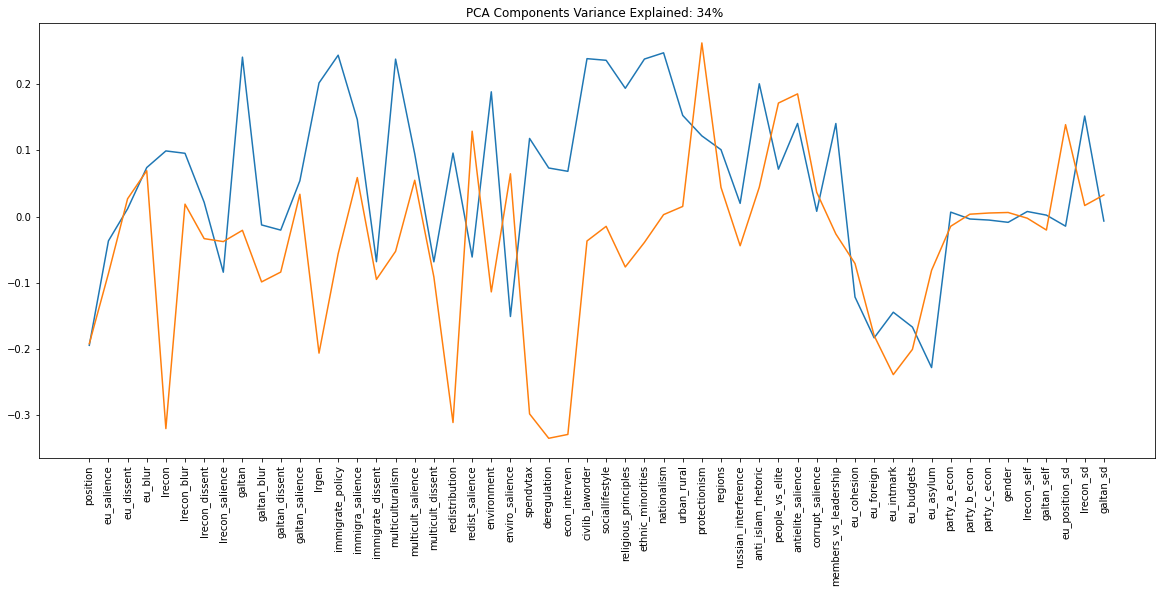

In [711]:
components = pca.components_

plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.plot(df_scale.columns, components[0])
plt.plot(df_scale.columns, components[1])
plt.title('PCA Components Variance Explained: {0:.0%} '.format(explained_varience))

In [712]:
principalDf

,component 1,component 2
0,-0.830721,-2.051131
1,0.779137,3.250979
2,-0.993997,-1.007986
3,1.778663,-0.386948
4,3.247491,-0.248822
...,...,...
3483,4.691517,-0.015608
3484,5.241863,0.027189
3485,5.305012,0.243575
3486,5.977224,-0.013893


In [713]:
finalDf = pd.concat([principalDf, df_paryId_lrgen], axis = 1)
finalDf

,component 1,component 2,party_name,lrgen
0,-0.830721,-2.051131,GERB,5.0
1,0.779137,3.250979,BSP,3.0
2,-0.993997,-1.007986,DPS,4.0
3,1.778663,-0.386948,Volya,6.0
4,3.247491,-0.248822,NFSB,6.0
...,...,...,...,...
3483,4.691517,-0.015608,BREXIT,8.0
3484,5.241863,0.027189,BREXIT,8.0
3485,5.305012,0.243575,BREXIT,8.0
3486,5.977224,-0.013893,BREXIT,8.0


### Visualize 2D Projection
Plot 2 dimentional points, distinct by party_id

No handles with labels found to put in legend.


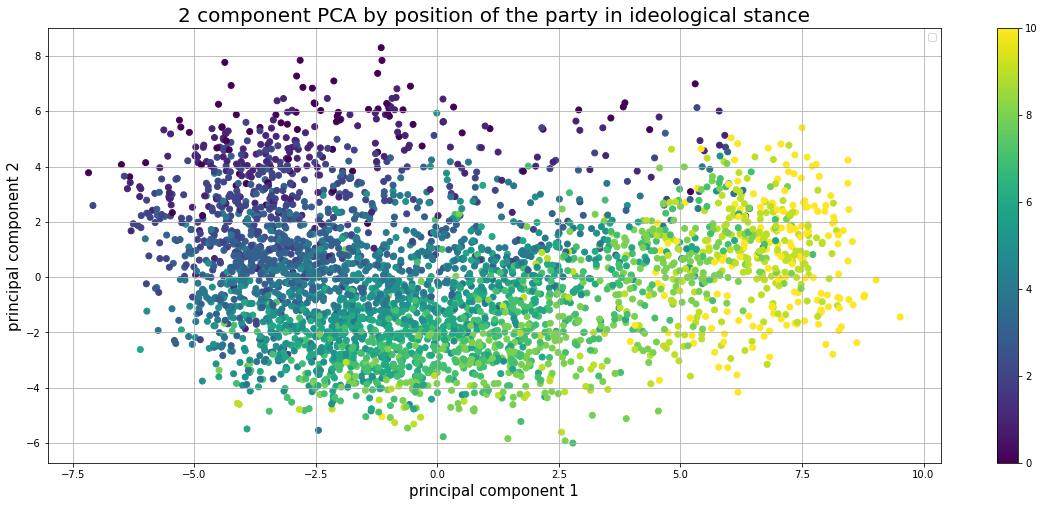

In [714]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 component PCA by position of the party in ideological stance', fontsize = 20)
points = ax.scatter(x = finalDf['component 1'], y = finalDf['component 2'], c = finalDf['lrgen'])
fig.colorbar(points)
ax.legend()
ax.grid()


## <b> 3. Estimate the distribution of the 2D points from Step 2. 
### Kernel Density Estimation

In [715]:
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv = 5)
grid.fit(principalComponents)
print("bandwidth selcted : ",grid.best_estimator_.bandwidth )

kde = grid.best_estimator_
new_data = kde.sample(10, random_state=0)

print("new data points generated : ")
print(new_data)

bandwidth selcted :  0.6951927961775606
new data points generated : 
[[-4.57707467  2.12686419]
 [-3.41904491  2.67949554]
 [ 5.60979374  1.6484834 ]
 [-3.85710845  1.54369007]
 [-0.03284394 -2.36368894]
 [ 0.64725322 -1.8491795 ]
 [ 0.1670337  -3.6007228 ]
 [-0.98155094 -0.26949311]
 [ 7.03830106 -1.45387455]
 [-1.02373269 -2.92353645]]


In [716]:
num = 100
def lim(y, i):
        mi = y[:, i].min()
        ma = y[:, i].max()
        return [mi - 0.2 * abs(mi), ma + 0.2 * abs(ma)]

xlim = lim(principalComponents, 0)
ylim = lim(principalComponents, 1)

(x, y) = np.meshgrid(
        np.linspace(*xlim, num=num),
        np.linspace(*ylim, num=num)
    )

density = np.exp(
        kde.score_samples(np.c_[x.ravel(), y.ravel()])
    ).reshape(num, num)


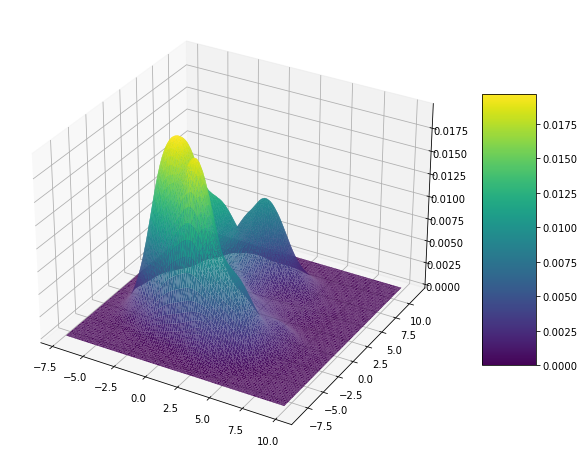

In [717]:
flat_x = [item for sublist in x for item in sublist]
flat_x = np.array(flat_x)

flat_y = [item for sublist in y for item in sublist]
flat_y = np.array(flat_y)

flat_density = [item for sublist in density for item in sublist]
flat_density = np.array(flat_density)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(flat_y, flat_x, flat_density, cmap=plt.cm.viridis, linewidth=0.2)

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()


In [718]:
flat_new_data = [item for sublist in new_data for item in sublist]
flat_new_data = np.array(flat_new_data)
df_pc = pd.DataFrame(flat_new_data.reshape(10,2))
df_pc


,0,1
0,-4.577075,2.126864
1,-3.419045,2.679496
2,5.609794,1.648483
3,-3.857108,1.543690
4,-0.032844,-2.363689
5,0.647253,-1.849180
6,0.167034,-3.600723
7,-0.981551,-0.269493
8,7.038301,-1.453875
9,-1.023733,-2.923536


No handles with labels found to put in legend.


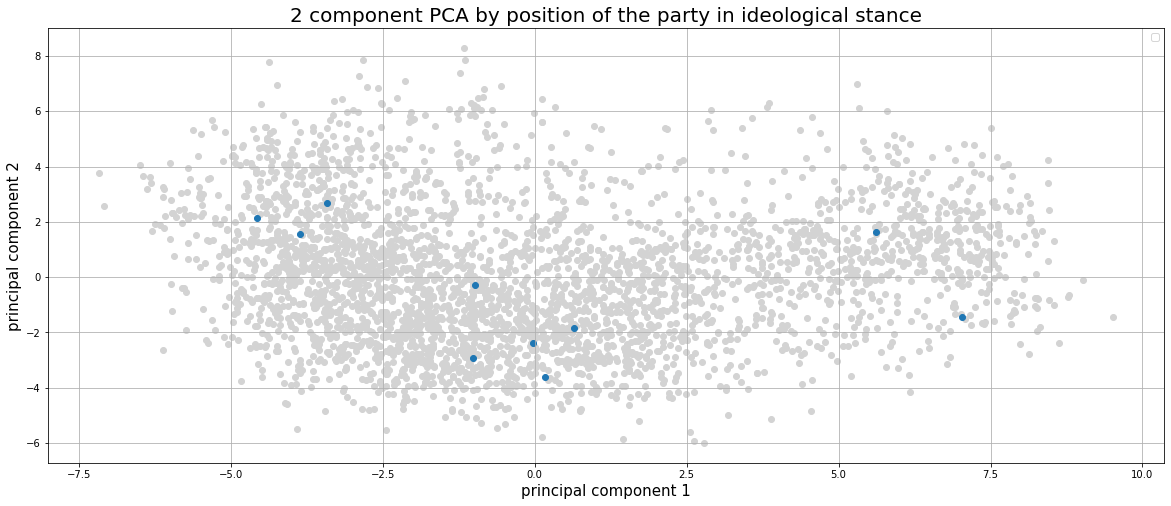

In [719]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 component PCA by position of the party in ideological stance', fontsize = 20)
points = ax.scatter(x = finalDf['component 1'], y = finalDf['component 2'], c = '#D3D3D3' )
new_points = ax.scatter(x = df_pc[0], y = df_pc[1] )
    
ax.legend()
ax.grid()


# 4. Find feature values from the high-dimensional space that map to the sampled 2D points. 

In [720]:
# 4. Find feature values from the high-dimensional space that map to the sampled 2D points. 
new_data_converted = std.inverse_transform(
    pca.inverse_transform(new_data))


In [721]:
new_data_converted.max()

10.881346305381802

In [722]:
new_data_converted

array([[ 5.96122987,  6.14690803,  2.49583011,  2.63914067,  2.19711389,
         2.80128839,  2.5198029 ,  7.00989848,  1.55390145,  2.40553016,
         2.48392313,  5.99171812,  1.82063794,  2.07554711,  4.48126358,
         2.73986636,  1.99449515,  4.54549793,  2.57009658,  1.68214746,
         7.42552057,  2.51566138,  6.86753715,  1.59049483,  2.09045863,
         1.95932995,  1.78434963,  0.91658899,  1.08247168,  1.15669936,
         1.69408772,  3.01953682,  5.32568968,  3.70665977,  2.3209595 ,
         0.44601549,  4.78748202,  3.62100523,  4.74763778,  5.43352518,
         6.03173079,  4.8712627 ,  5.38714927,  4.37103857,  5.42377436,
         2.6708406 ,  9.16852182,  5.85915782,  1.73308714,  4.90752777,
         3.2490371 ,  0.80252429,  0.76817572,  1.42648756],
       [ 5.32814955,  5.93177587,  2.547249  ,  2.92210236,  2.04486492,
         3.07142684,  2.53115718,  6.74870703,  2.38083039,  2.25923422,
         2.3447454 ,  6.18512121,  2.12753429,  2.80472609,  5.

In [723]:
new_data_inverted_df = pd.DataFrame(new_data_converted, columns= df_num.columns)
new_data_inverted_df

,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,5.961230,6.146908,2.495830,2.639141,2.197114,2.801288,2.519803,7.009898,1.553901,2.405530,2.483923,5.991718,1.820638,2.075547,4.481264,2.739866,1.994495,4.545498,2.570097,1.682147,7.425521,2.515661,6.867537,1.590495,2.090459,1.959330,1.784350,0.916589,1.082472,1.156699,1.694088,3.019537,5.325690,3.706660,2.320960,0.446015,4.787482,3.621005,4.747638,5.433525,6.031731,4.871263,5.387149,4.371039,5.423774,2.670841,9.168522,5.859158,1.733087,4.907528,3.249037,0.802524,0.768176,1.426488
1,5.328150,5.931776,2.547249,2.922102,2.044865,3.071427,2.531157,6.748707,2.380830,2.259234,2.344745,6.185121,2.127534,2.804726,5.008004,2.473725,2.723210,4.934469,2.326626,1.530649,7.426220,2.903959,6.486803,1.517501,1.833152,1.693704,2.522521,1.775503,1.624540,1.920420,2.583175,3.462062,6.041496,4.043709,2.316763,1.296029,5.275919,4.498051,4.841456,5.787109,5.748956,4.299953,4.868402,3.832046,4.848507,2.670435,9.166539,5.856066,1.729801,4.921351,3.232951,0.816013,0.840408,1.431084
2,2.351293,5.350804,2.688098,4.284808,5.035376,4.954946,2.937284,5.158743,9.172892,2.231626,2.148366,7.264635,7.348943,9.363085,8.296205,1.425090,9.236442,7.154295,1.342751,4.475473,5.887390,7.452740,2.576562,5.065667,4.416604,4.160828,8.847637,8.729585,7.062246,8.503690,9.468938,6.718462,8.117498,6.111429,2.974128,7.141002,6.566306,8.064162,4.947187,8.880286,4.139997,1.607348,3.033377,1.527858,1.171384,2.730374,9.136001,5.805642,1.688660,5.055395,3.305012,0.753936,1.368962,1.387554
3,5.907651,6.203438,2.482664,2.668672,2.827508,2.930591,2.581984,6.925001,2.127847,2.507750,2.551644,6.037608,2.502372,2.680432,4.666663,2.752541,2.591888,4.646247,2.577429,2.304062,7.157932,3.021113,6.467378,2.259702,2.727050,2.581817,2.342176,1.495258,1.629724,1.740642,2.238829,3.261019,5.162406,3.818989,2.438121,0.838700,4.654163,3.598400,4.697363,5.711736,5.959324,4.821834,5.448113,4.365384,5.206370,2.681540,9.164672,5.852668,1.728351,4.920681,3.273311,0.781883,0.807075,1.415570
4,5.920131,6.669963,2.373296,2.697628,6.809473,3.583642,2.960436,6.541750,5.228762,3.219491,3.046130,6.216401,6.552488,6.025824,5.527315,2.975508,5.891185,5.058132,2.755035,6.233175,5.502397,5.936627,4.199033,6.438691,6.804419,6.576462,5.391603,4.608020,4.720268,4.937730,5.125338,4.514310,3.763600,4.330708,3.165093,2.805900,3.564203,2.982167,4.335428,7.240525,5.665059,4.826435,6.106988,4.623190,4.174115,2.747943,9.141933,5.814202,1.700838,4.994530,3.432191,0.646883,1.008444,1.345545
5,5.478638,6.504617,2.412745,2.893813,6.571447,3.750213,2.955806,6.372472,5.702144,3.093978,2.932776,6.345224,6.632099,6.423000,5.865786,2.782693,6.289566,5.315487,2.579518,5.997423,5.557744,6.110549,4.008935,6.249354,6.490036,6.259024,5.804852,5.103294,4.995526,5.363887,5.649132,4.781095,4.308670,4.548580,3.138079,3.332934,3.940625,3.613643,4.412787,7.436214,5.477796,4.428240,5.723733,4.239120,3.807520,2.745459,9.141305,5.813323,1.699460,5.001714,3.415718,0.660754,1.052098,1.351068
6,6.299713,6.906403,2.317281,2.535997,7.825617,3.574704,3.041647,6.608076,5.457510,3.471971,3.243877,6.142885,7.311283,6.369558,5.413953,3.185686,6.224481,4.922433,2.941182,7.236587,5.117172,6.383265,3.898321,7.453475,7.905248,7.663012,5.661193,4.820491,5.116096,5.226441,5.267266,4.542320,3.012564,4.249108,3.336565,2.757396,3.020

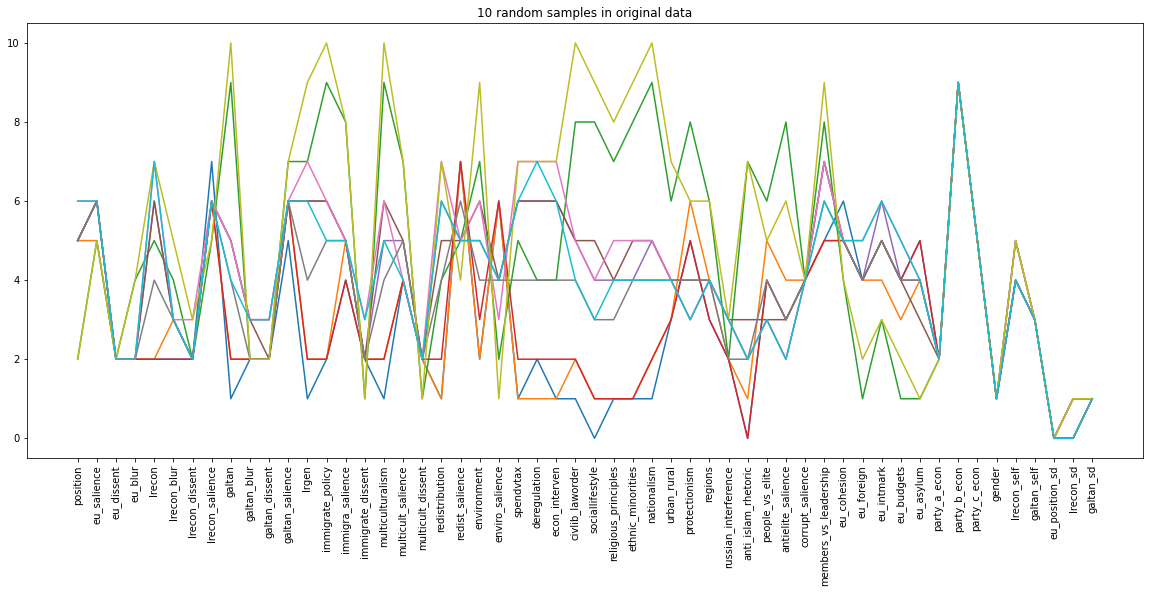

In [724]:
new_data_inverted_df = pd.DataFrame(new_data_converted, columns= df_num.columns)
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90);
plt.title('10 random samples in original data')

for i in range(0,len(new_data_converted)):
    plt.plot(df_scale.columns,np.floor(new_data_converted[i]))

## <b> 2. Dimensionality Reduction
### 2nd Approach:
- Factor Analysis Rotation

In [725]:
ica = FactorAnalysis(rotation='varimax', n_components=2).fit(df_scale)

principalComponents = ica.transform(df_scale)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])


Text(0.5, 1.0, 'Factor Analysis Components Variance Explained ')

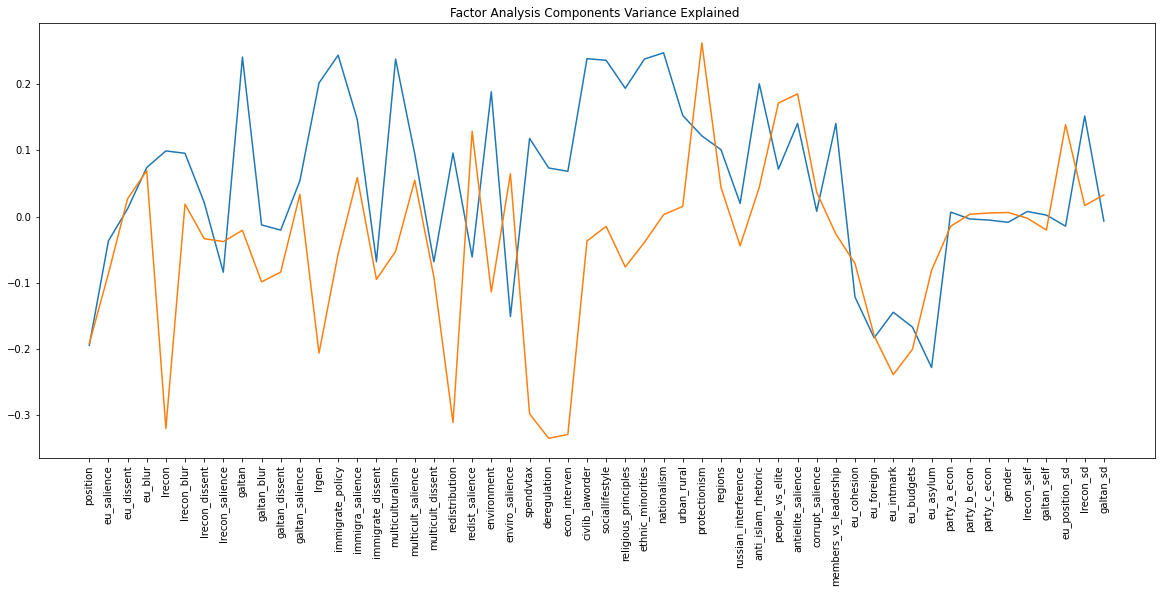

In [726]:
components = pca.components_

plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
plt.plot(df_scale.columns, components[0])
plt.plot(df_scale.columns, components[1])
plt.title('Factor Analysis Components Variance Explained ')

In [727]:
finalDf = pd.concat([principalDf, df_paryId_lrgen], axis = 1)
finalDf

,component 1,component 2,party_name,lrgen
0,-0.235873,-0.545998,GERB,5.0
1,0.572264,1.377889,BSP,3.0
2,-0.409344,-0.310117,DPS,4.0
3,0.491858,-0.382670,Volya,6.0
4,0.928987,-0.162935,NFSB,6.0
...,...,...,...,...
3483,1.146187,-0.436396,BREXIT,8.0
3484,1.368237,-0.447140,BREXIT,8.0
3485,1.389673,-0.366298,BREXIT,8.0
3486,1.571926,-0.442424,BREXIT,8.0


### Visualize 2D Projection
Plot 2 dimentional points, distinct by party_id

No handles with labels found to put in legend.


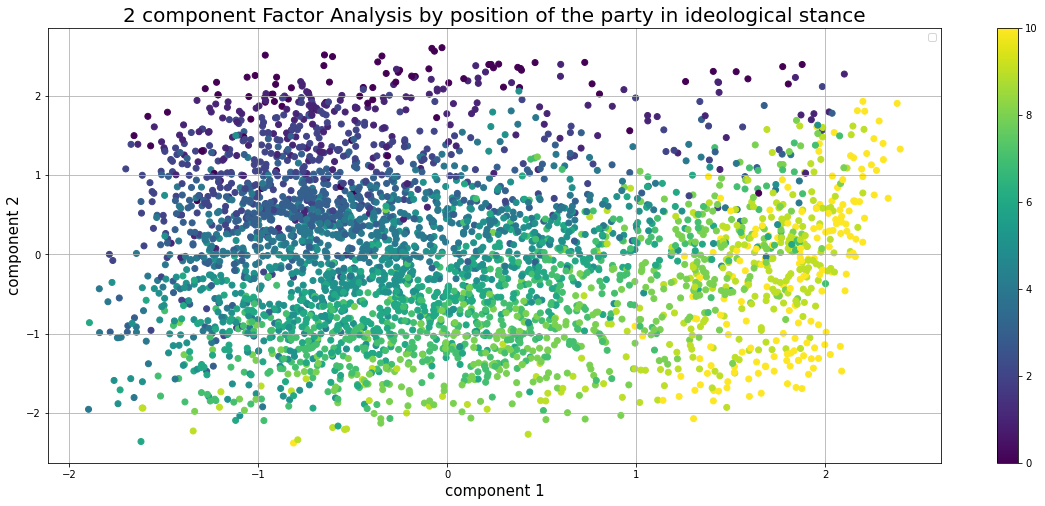

In [728]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('component 1', fontsize = 15)
ax.set_ylabel('component 2', fontsize = 15)
ax.set_title('2 component Factor Analysis by position of the party in ideological stance', fontsize = 20)
points = ax.scatter(x = finalDf['component 1'], y = finalDf['component 2'], c = finalDf['lrgen'])
fig.colorbar(points)
ax.legend()
ax.grid()

## <b> 3. Estimate the distribution of the 2D points from Step 2. 
### Kernel Density Estimation

In [729]:
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv = 5)
grid.fit(principalComponents)
print("bandwidth selcted : ",grid.best_estimator_.bandwidth )

kde = grid.best_estimator_
new_data = kde.sample(10, random_state=0)

print("new data points generated : ")
print(new_data)

bandwidth selcted :  0.20691380811147897
new data points generated : 
[[-1.14336578  0.90513158]
 [-0.83883634  1.0783131 ]
 [ 1.56582436  0.21416505]
 [-0.89135184  0.88661853]
 [-0.08598564 -0.7800722 ]
 [ 0.17224774 -0.72626003]
 [-0.11911237 -1.31932592]
 [-0.13583329  0.24877045]
 [ 1.69697824 -1.14508939]
 [-0.35731441 -0.95130256]]


In [730]:
num = 100
def lim(y, i):
        mi = y[:, i].min()
        ma = y[:, i].max()
        return [mi - 0.2 * abs(mi), ma + 0.2 * abs(ma)]

xlim = lim(principalComponents, 0)
ylim = lim(principalComponents, 1)

(x, y) = np.meshgrid(
        np.linspace(*xlim, num=num),
        np.linspace(*ylim, num=num)
    )

density = np.exp(
        kde.score_samples(np.c_[x.ravel(), y.ravel()])
    ).reshape(num, num)


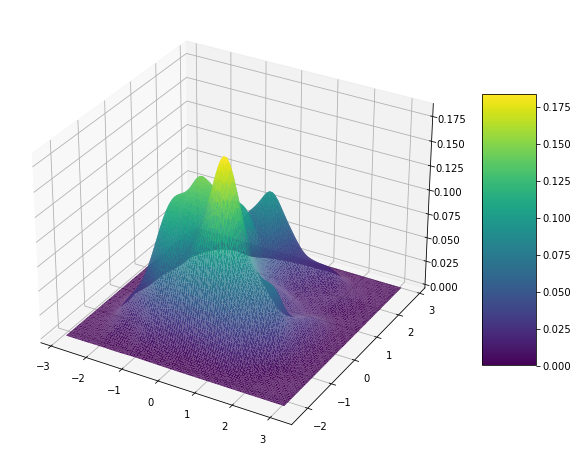

In [731]:
flat_x = [item for sublist in x for item in sublist]
flat_x = np.array(flat_x)

flat_y = [item for sublist in y for item in sublist]
flat_y = np.array(flat_y)

flat_density = [item for sublist in density for item in sublist]
flat_density = np.array(flat_density)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(flat_y, flat_x, flat_density, cmap=plt.cm.viridis, linewidth=0.2)

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()


In [732]:
flat_new_data = [item for sublist in new_data for item in sublist]
flat_new_data = np.array(flat_new_data)
df_pc = pd.DataFrame(flat_new_data.reshape(10,2))
df_pc


,0,1
0,-1.143366,0.905132
1,-0.838836,1.078313
2,1.565824,0.214165
3,-0.891352,0.886619
4,-0.085986,-0.780072
5,0.172248,-0.726260
6,-0.119112,-1.319326
7,-0.135833,0.248770
8,1.696978,-1.145089
9,-0.357314,-0.951303


No handles with labels found to put in legend.


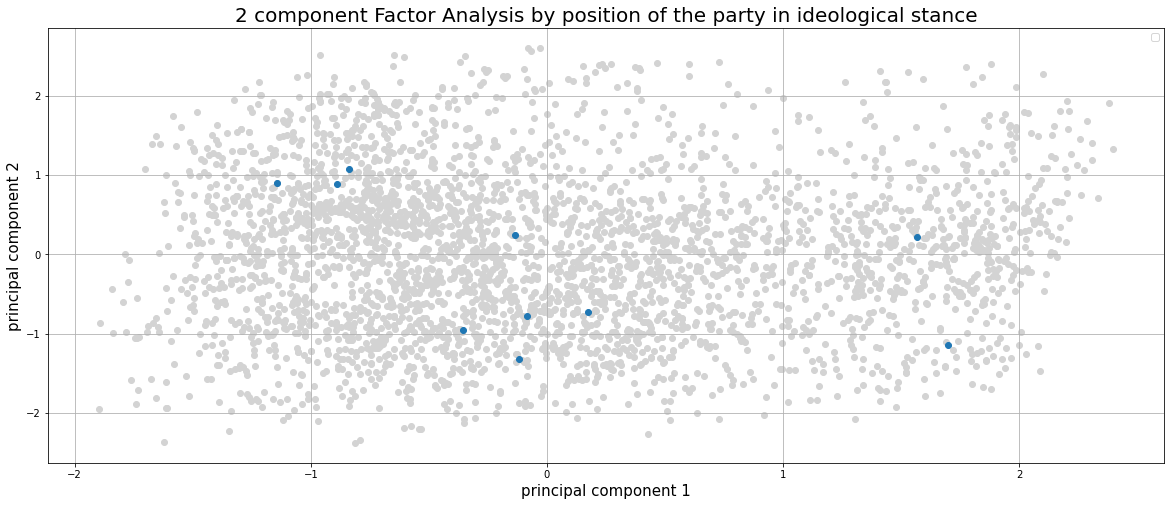

In [733]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 component Factor Analysis by position of the party in ideological stance', fontsize = 20)
points = ax.scatter(x = finalDf['component 1'], y = finalDf['component 2'], c = '#D3D3D3' )
new_points = ax.scatter(x = df_pc[0], y = df_pc[1] )
    
ax.legend()
ax.grid()


# 4. Find feature values from the high-dimensional space that map to the sampled 2D points. 

In [741]:
# 4. Find feature values from the high-dimensional space that map to the sampled 2D points. 
new_data_converted = std.inverse_transform(
    pca.inverse_transform(new_data))


In [740]:
new_data_converted.max()

9.154564356122705

In [736]:
new_data_converted

array([[5.13350252, 6.09630249, 2.50899149, 3.02633396, 3.9834863 ,
        3.48300199, 2.72360056, 6.47459644, 4.1905138 , 2.56796102,
        2.54732435, 6.33570205, 4.24584732, 4.70538289, 5.60458732,
        2.50053602, 4.60071969, 5.2634118 , 2.33799522, 3.44313628,
        6.60036007, 4.48195379, 5.23413337, 3.57958119, 3.78604375,
        3.60267864, 4.27835003, 3.601246  , 3.33866319, 3.75803618,
        4.30559628, 4.22784337, 5.57063975, 4.40599202, 2.67817739,
        2.54733295, 4.88702812, 4.46884625, 4.69062555, 6.66213857,
        5.51239953, 4.12097412, 5.03257166, 3.78966633, 4.15089917,
        2.70343972, 9.15456436, 5.83589163, 1.71502987, 4.96258653,
        3.30712502, 0.75293061, 0.9638075 , 1.39760137],
       [4.95680039, 6.03400956, 2.52386978, 3.10514496, 3.92165667,
        3.55520245, 2.72492964, 6.40358134, 4.40617471, 2.52368315,
        2.50608829, 6.3887964 , 4.31179683, 4.89258172, 5.74737593,
        2.42519416, 4.78801306, 5.36994067, 2.26919913, 3.3

In [737]:
new_data_inverted_df = pd.DataFrame(new_data_converted, columns= df_num.columns)
new_data_inverted_df

,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,5.133503,6.096302,2.508991,3.026334,3.983486,3.483002,2.723601,6.474596,4.190514,2.567961,2.547324,6.335702,4.245847,4.705383,5.604587,2.500536,4.600720,5.263412,2.337995,3.443136,6.600360,4.481954,5.234133,3.579581,3.786044,3.602679,4.278350,3.601246,3.338663,3.758036,4.305596,4.227843,5.570640,4.405992,2.678177,2.547333,4.887028,4.468846,4.690626,6.662139,5.512400,4.120974,5.032572,3.789666,4.150899,2.703440,9.154564,5.835892,1.715030,4.962587,3.307125,0.752931,0.963807,1.397601
1,4.956800,6.034010,2.523870,3.105145,3.921657,3.555202,2.724930,6.403581,4.406175,2.523683,2.506088,6.388796,4.311797,4.892582,5.747376,2.425194,4.788013,5.369941,2.269199,3.381773,6.608600,4.576129,5.138924,3.538908,3.694437,3.509153,4.469496,3.825774,3.474893,3.955593,4.539642,4.345226,5.777160,4.497548,2.673474,2.774944,5.028608,4.716553,4.718561,6.753366,5.434930,3.961546,4.884630,3.638024,3.995405,2.703004,9.154122,5.835216,1.714247,4.966085,3.301865,0.757350,0.982983,1.399224
2,4.380274,6.000327,2.532670,3.374949,5.179365,4.032256,2.868160,6.029419,6.253173,2.639219,2.551913,6.629005,6.014728,6.735681,6.532739,2.259233,6.614511,5.871400,2.108121,4.621623,6.028257,5.955581,3.993525,4.938483,4.889227,4.667279,6.216983,5.706278,5.056868,5.778343,6.368434,5.191105,5.943085,4.986400,2.924743,4.245264,5.094286,5.305062,4.677632,7.614316,5.072192,3.438934,4.639856,3.233925,3.105292,2.725934,9.144323,5.818880,1.701576,5.004685,3.342861,0.722351,1.119931,1.378868
3,5.046646,6.077979,2.513423,3.065991,4.058927,3.536003,2.734326,6.429359,4.379432,2.565051,2.540135,6.366657,4.386150,4.886762,5.697942,2.469293,4.780919,5.326934,2.308775,3.517401,6.560377,4.605995,5.126801,3.670703,3.849331,3.662818,4.453802,3.794854,3.488112,3.940580,4.497881,4.319109,5.635323,4.464783,2.695199,2.711982,4.927886,4.574674,4.694780,6.747829,5.466345,4.042431,4.977105,3.721703,4.046710,2.704991,9.153741,5.834535,1.713911,4.966277,3.308757,0.751519,0.978627,1.396539
4,5.358865,6.349480,2.449296,2.938799,5.557671,3.638343,2.864215,6.419204,5.086941,2.890827,2.784717,6.336612,5.686078,5.729262,5.749820,2.678446,5.607152,5.285219,2.490678,4.996869,5.967692,5.460397,4.500278,5.201414,5.433280,5.221212,5.186036,4.491054,4.330387,4.713227,5.098460,4.552412,4.786868,4.484028,2.957347,3.002631,4.300463,3.927838,4.519674,7.122940,5.498521,4.321802,5.465021,4.075960,3.957021,2.728947,9.146569,5.822275,1.705665,4.985981,3.373424,0.696659,1.015563,1.369250
5,5.243162,6.315760,2.457381,2.990931,5.578032,3.695687,2.870876,6.366764,5.275823,2.872674,2.765236,6.374170,5.791289,5.903216,5.856637,2.632443,5.780463,5.361389,2.448274,5.016728,5.947771,5.566763,4.403133,5.238665,5.435571,5.220979,5.358051,4.685932,4.467014,4.891706,5.296121,4.648572,4.900921,4.551906,2.965383,3.182007,4.376648,4.080875,4.532459,7.206160,5.443209,4.217308,5.378069,3.980446,3.839246,2.729677,9.145931,5.821243,1.704730,4.989405,3.372404,0.697493,1.031220,1.369243
6,5.569022,6.463108,2.422332,2.848020,5.971545,3.608786,2.895024,6.470442,5.097079,3.004119,2.875821,6.289084,5.954585,5.793997,5.654501,2.786675,5.667831,5.194407,2.587281,5.405669,5.816288,5.598423,4.418850,5.607113,5.890552,5.673677,5.220776,4.491713,4.433627,4.753015,5.068498,4.520751,4.422808,4.419476,3.025116,2.901623,4.039

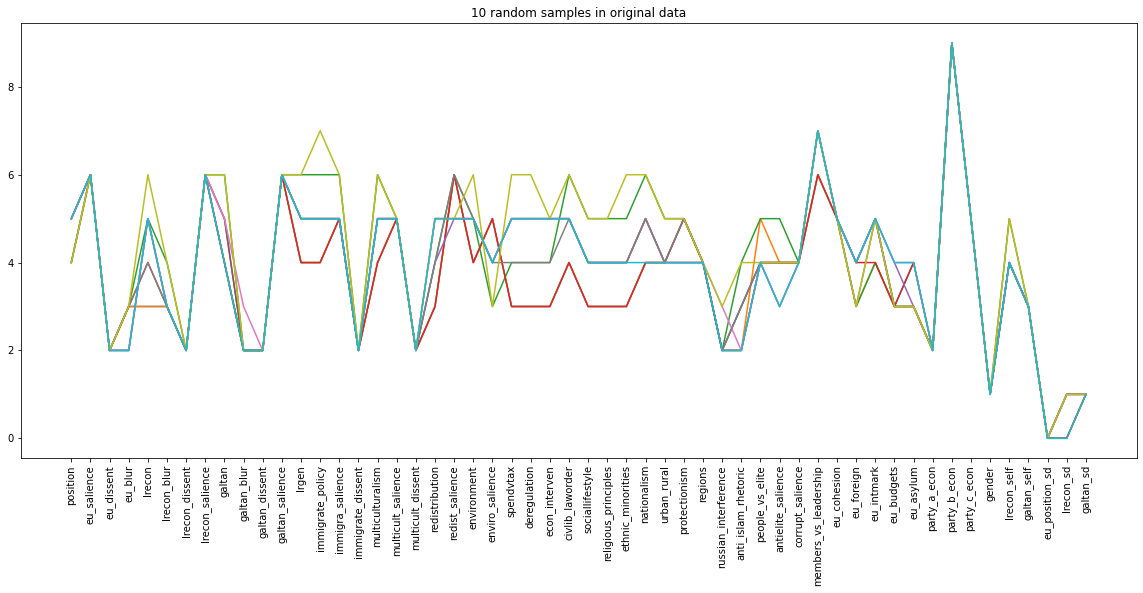

In [738]:
new_data_inverted_df = pd.DataFrame(new_data_converted, columns= df_num.columns)
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90);
plt.title('10 random samples in original data')

for i in range(0,len(new_data_converted)):
    plt.plot(df_scale.columns,np.floor(new_data_converted[i]))